# Importing Libraries and Reading Data

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
import xgboost as xgb
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/modified_AQI.csv')
df.head()

Unnamed: 0         From Date  PM2.5   PM10    NO2    NOx   NH3   SO2    CO  \
0           0  12-01-2021 00:00  24.21  46.97  15.62  10.59  6.67  5.67  0.77   
1           1  13-01-2021 00:00  45.15  69.01  16.01  10.66  8.63  5.29  0.70   
2           2  14-01-2021 00:00  32.03  49.90  13.24   8.60  8.43  4.25  0.64   
3           3  15-01-2021 00:00  39.19  60.39  10.89   6.67  9.98  4.00  0.62   
4           4  16-01-2021 00:00  29.91  56.37  15.73   9.79  9.59  4.56  0.62   

   Ozone  PM2.5_SubIndex  PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  \
0  35.52       40.350000          46.97        7.0875       13.2375   
1  33.00       75.250000          69.01        6.6125       13.3250   
2  28.69       53.383333          49.90        5.3125       10.7500   
3  45.71       65.316667          60.39        5.0000        8.3375   
4  43.76       49.850000          56.37        5.7000       12.2375   

   NH3_SubIndex  CO_SubIndex  NO2_SubIndex  O3_SubIndex  AQI_Value  \
0        1.6675         38.5       19.5250        35.52       47.0   
1        2.1575         35.0       20.0125        33.00       75.0   
2        2.1075         32.0       16.5500        28.69       53.0   
3        2.4950         31.0       13.6125        45.71       65.0   
4        2.3975         31.0       19.6625        43.76       56.0   

      AQI_Range  
0          Good  
1  Satisfactory  
2  Satisfactory  
3  Satisfactory  
4  Satisfactory

<Axes: >

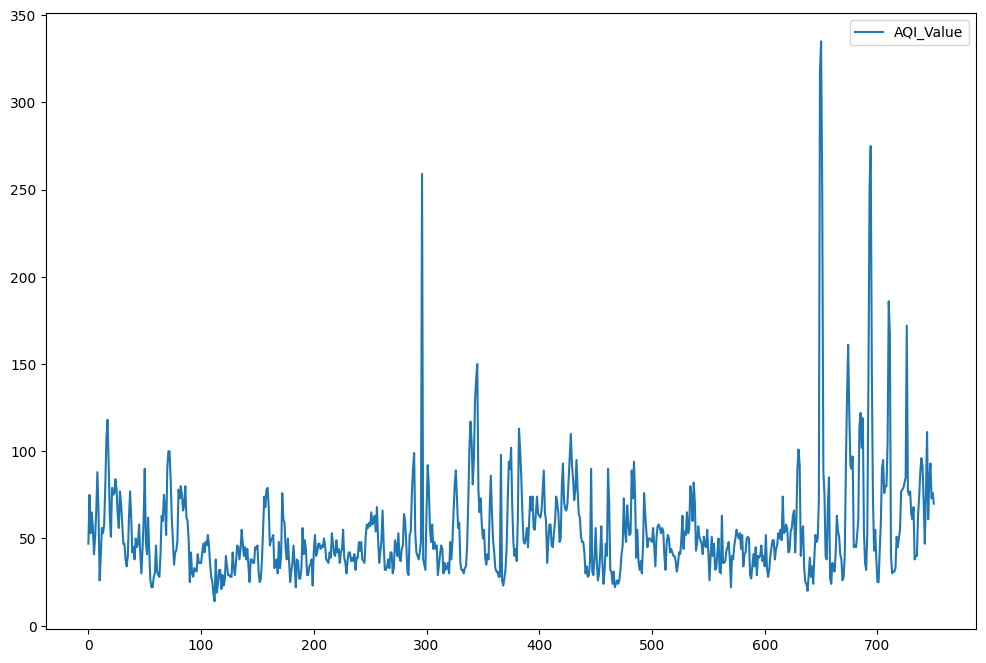

In [ ]:
df['AQI_Value'].plot(figsize=(12,8),legend=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'From Date', 'PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'SO2',
       'CO', 'Ozone', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'NO2_SubIndex',
       'O3_SubIndex', 'AQI_Value', 'AQI_Range'],
      dtype='object')

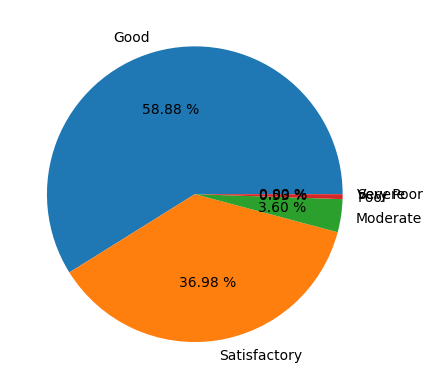

In [ ]:
good_count = df.loc[df['AQI_Range']=='Good'].count()[0]
satisfactory_count = df.loc[df['AQI_Range']=='Satisfactory'].count()[0]
moderate_count = df.loc[df['AQI_Range']=='Moderate'].count()[0]
poor_count = df.loc[df['AQI_Range']=='Poor'].count()[0]
verypoor_count = df.loc[df['AQI_Range']=='Very poor'].count()[0]
severe_count = df.loc[df['AQI_Range']=='Severe'].count()[0]
labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Severe']

plt.pie([good_count,satisfactory_count,moderate_count,poor_count,verypoor_count,severe_count], labels=labels, autopct='%.2f %%')
plt.show()


# Preprocessing

1) Dropping columns of no use

In [ ]:
df.columns

Index(['Unnamed: 0', 'From Date', 'PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'SO2',
       'CO', 'Ozone', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'NO2_SubIndex',
       'O3_SubIndex', 'AQI_Value', 'AQI_Range'],
      dtype='object')

In [ ]:
df=df.drop(columns=['Unnamed: 0','PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','NH3_SubIndex', 'CO_SubIndex', 'NO2_SubIndex',
       'O3_SubIndex','AQI_Range'])
df.head()

From Date  PM2.5   PM10    NO2    NOx   NH3   SO2    CO  Ozone  \
0  12-01-2021 00:00  24.21  46.97  15.62  10.59  6.67  5.67  0.77  35.52   
1  13-01-2021 00:00  45.15  69.01  16.01  10.66  8.63  5.29  0.70  33.00   
2  14-01-2021 00:00  32.03  49.90  13.24   8.60  8.43  4.25  0.64  28.69   
3  15-01-2021 00:00  39.19  60.39  10.89   6.67  9.98  4.00  0.62  45.71   
4  16-01-2021 00:00  29.91  56.37  15.73   9.79  9.59  4.56  0.62  43.76   

   AQI_Value  
0       47.0  
1       75.0  
2       53.0  
3       65.0  
4       56.0

2) Checking for null values

In [ ]:
df.isnull().sum()

From Date    0
PM2.5        0
PM10         0
NO2          0
NOx          0
NH3          0
SO2          0
CO           0
Ozone        0
AQI_Value    0
dtype: int64

3) Checking shape of Dataset

In [ ]:
df.shape

(751, 10)

4) Checking the statistics of the dataset

In [ ]:
df.describe()

PM2.5        PM10         NO2         NOx         NH3         SO2  \
count  751.000000  751.000000  751.000000  751.000000  751.000000  751.000000   
mean    23.233675   47.712410   11.461238    7.905832    8.919947   10.465912   
std     17.601192   24.504446    7.422429    4.649319    2.794276    5.005179   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.725000   30.190000    7.320000    5.085000    7.240000    7.210000   
50%     17.380000   43.920000   10.170000    7.270000    8.630000    9.790000   
75%     29.660000   60.220000   14.475000    9.995000   10.010000   12.755000   
max    165.140000  178.680000   88.920000   61.060000   38.540000   42.160000   

               CO       Ozone   AQI_Value  
count  751.000000  751.000000  751.000000  
mean     0.547297   33.143063   54.209055  
std      0.203424   13.473316   30.807752  
min      0.000000    0.000000   14.000000  
25%      0.415000   23.630000   37.000000  
50%      0.540000   31.950000   47.000000  
75%      0.650000   40.280000   63.000000  
max      1.870000   82.690000  335.000000

# Dividing Dataset into individual groups for Time Series Forecasting

In [ ]:
df.head()

From Date  PM2.5   PM10    NO2    NOx   NH3   SO2    CO  Ozone  \
0  12-01-2021 00:00  24.21  46.97  15.62  10.59  6.67  5.67  0.77  35.52   
1  13-01-2021 00:00  45.15  69.01  16.01  10.66  8.63  5.29  0.70  33.00   
2  14-01-2021 00:00  32.03  49.90  13.24   8.60  8.43  4.25  0.64  28.69   
3  15-01-2021 00:00  39.19  60.39  10.89   6.67  9.98  4.00  0.62  45.71   
4  16-01-2021 00:00  29.91  56.37  15.73   9.79  9.59  4.56  0.62  43.76   

   AQI_Value  
0       47.0  
1       75.0  
2       53.0  
3       65.0  
4       56.0

1) For PM.25

In [ ]:
df_PM25=df.copy()
df_PM25=df_PM25.drop(columns=['PM10',	'NO2',	'NOx',	'NH3',	'SO2',	'CO',	'Ozone',	'AQI_Value'])
df_PM25['From Date'] = pd.to_datetime(df_PM25['From Date'])
df_PM25 = df_PM25.set_index('From Date')
df_PM25.head()

PM2.5
From Date        
2021-12-01  24.21
2021-01-13  45.15
2021-01-14  32.03
2021-01-15  39.19
2021-01-16  29.91

2) For PM10

In [ ]:
df_PM10=df.copy()
df_PM10=df_PM10.drop(columns=['PM2.5',	'NO2',	'NOx',	'NH3',	'SO2',	'CO',	'Ozone',	'AQI_Value'])
df_PM10['From Date'] = pd.to_datetime(df_PM10['From Date'])
df_PM10 = df_PM10.set_index('From Date')
df_PM10.head()

PM10
From Date        
2021-12-01  46.97
2021-01-13  69.01
2021-01-14  49.90
2021-01-15  60.39
2021-01-16  56.37

3) For NO2

In [ ]:
df_NO2=df.copy()
df_NO2=df_NO2.drop(columns=['PM2.5',	'PM10',	'NOx',	'NH3',	'SO2',	'CO',	'Ozone',	'AQI_Value'])
df_NO2['From Date'] = pd.to_datetime(df_NO2['From Date'])
df_NO2 = df_NO2.set_index('From Date')
df_NO2.head()

NO2
From Date        
2021-12-01  15.62
2021-01-13  16.01
2021-01-14  13.24
2021-01-15  10.89
2021-01-16  15.73

4) For NOx

In [ ]:
df_NOx=df.copy()
df_NOx=df_NOx.drop(columns=['PM2.5',	'PM10',	'NO2',	'NH3',	'SO2',	'CO',	'Ozone',	'AQI_Value'])
df_NOx['From Date'] = pd.to_datetime(df_NOx['From Date'])
df_NOx = df_NOx.set_index('From Date')
df_NOx.head()

NOx
From Date        
2021-12-01  10.59
2021-01-13  10.66
2021-01-14   8.60
2021-01-15   6.67
2021-01-16   9.79

5) For NH3

In [ ]:
df_NH3=df.copy()
df_NH3=df_NH3.drop(columns=['PM2.5',	'PM10',	'NOx',	'NO2',	'SO2',	'CO',	'Ozone',	'AQI_Value'])
df_NH3['From Date'] = pd.to_datetime(df_NH3['From Date'])
df_NH3 = df_NH3.set_index('From Date')
df_NH3.head()

NH3
From Date       
2021-12-01  6.67
2021-01-13  8.63
2021-01-14  8.43
2021-01-15  9.98
2021-01-16  9.59

6) For SO2

In [ ]:
df_SO2=df.copy()
df_SO2=df_SO2.drop(columns=['PM2.5',	'PM10',	'NOx',	'NH3',	'NO2',	'CO',	'Ozone',	'AQI_Value'])
df_SO2['From Date'] = pd.to_datetime(df_SO2['From Date'])
df_SO2 = df_SO2.set_index('From Date')
df_SO2.head()

SO2
From Date       
2021-12-01  5.67
2021-01-13  5.29
2021-01-14  4.25
2021-01-15  4.00
2021-01-16  4.56

7) For CO

In [ ]:
df_CO=df.copy()
df_CO=df_CO.drop(columns=['PM2.5',	'PM10',	'NOx',	'NH3',	'SO2',	'NO2',	'Ozone',	'AQI_Value'])
df_CO['From Date'] = pd.to_datetime(df_CO['From Date'])
df_CO = df_CO.set_index('From Date')
df_CO.head()

CO
From Date       
2021-12-01  0.77
2021-01-13  0.70
2021-01-14  0.64
2021-01-15  0.62
2021-01-16  0.62

8) For O3

In [ ]:
df_Ozone=df.copy()
df_Ozone=df_Ozone.drop(columns=['PM2.5',	'PM10',	'NOx',	'NH3',	'SO2',	'CO',	'NO2',	'AQI_Value'])
df_Ozone['From Date'] = pd.to_datetime(df_Ozone['From Date'])
df_Ozone = df_Ozone.set_index('From Date')
df_Ozone.head()

Ozone
From Date        
2021-12-01  35.52
2021-01-13  33.00
2021-01-14  28.69
2021-01-15  45.71
2021-01-16  43.76

9) For AQI_Value

In [ ]:
df_AQI=df.copy()
df_AQI=df_AQI.drop(columns=['PM2.5',	'PM10',	'NOx',	'NH3',	'SO2',	'NO2',	'Ozone',	'CO'])
df_AQI['From Date'] = pd.to_datetime(df_AQI['From Date'])
df_AQI = df_AQI.set_index('From Date')
df_AQI.head()

AQI_Value
From Date            
2021-12-01       47.0
2021-01-13       75.0
2021-01-14       53.0
2021-01-15       65.0
2021-01-16       56.0

# 1) PM2.5



## **1) Visualization**

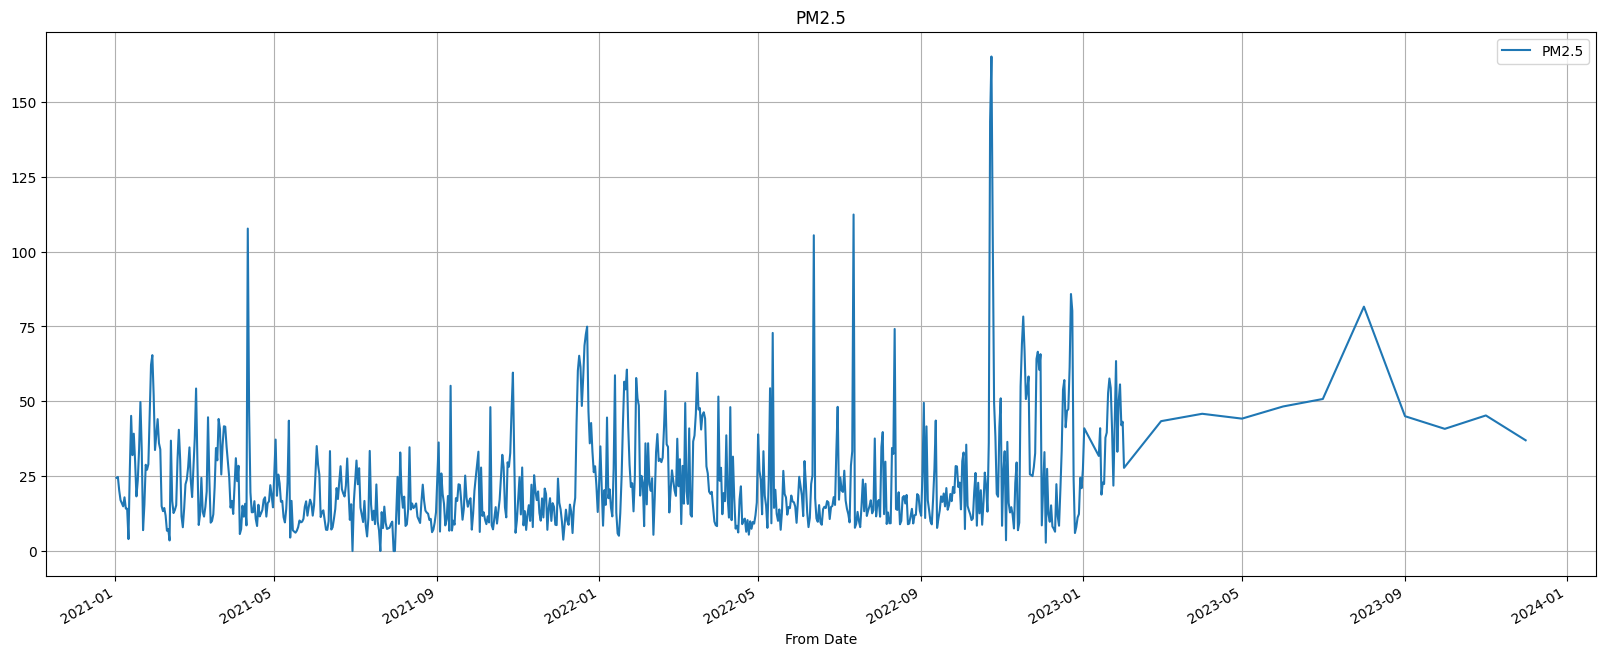

In [ ]:
df_PM25.plot(figsize=(20,8))
plt.title("PM2.5")
plt.grid();

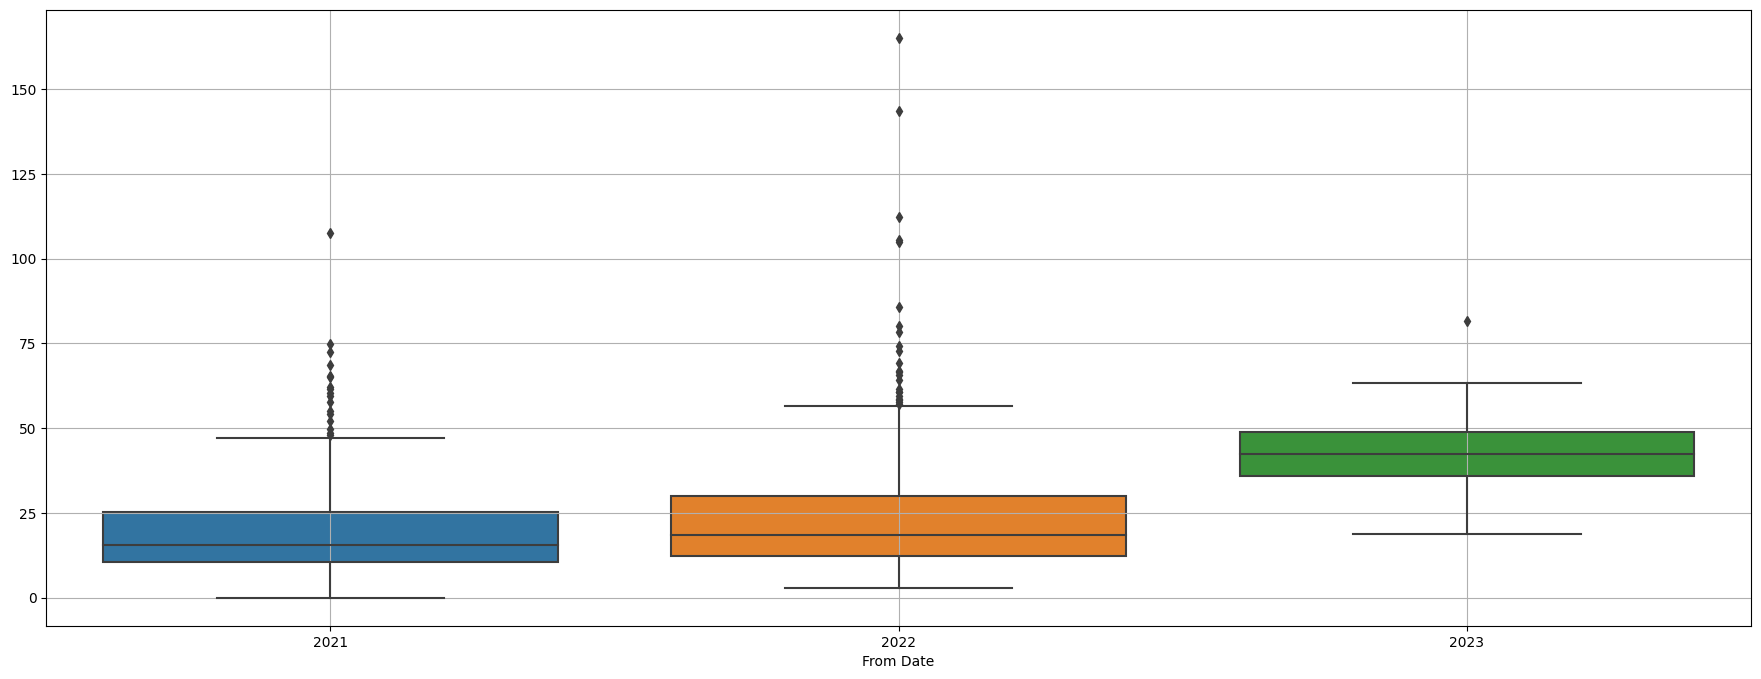

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_PM25.index.year,y = df_PM25.values[:,0],ax=ax)
plt.grid();

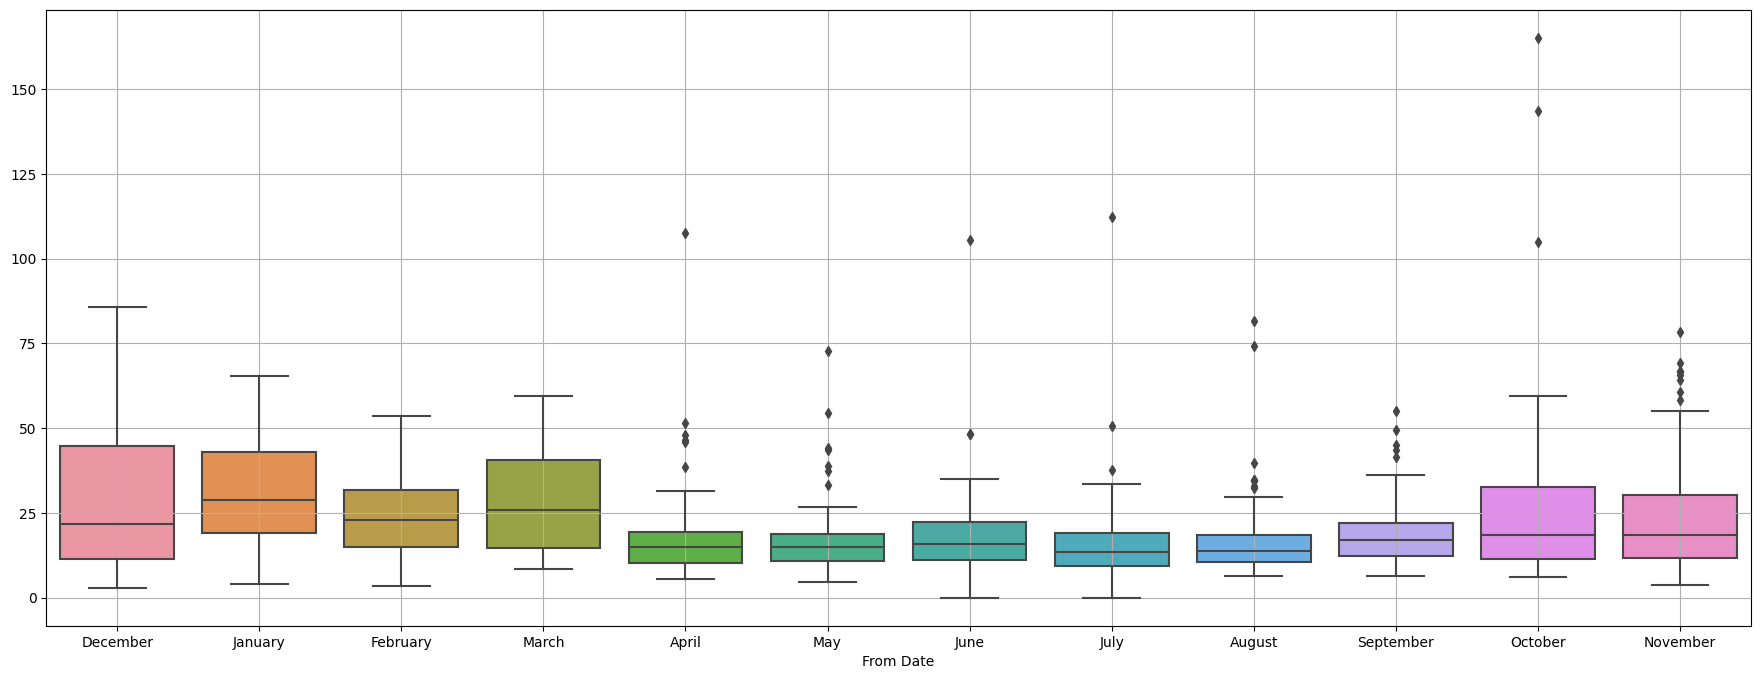

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_PM25.index.month_name(),y = df_PM25.values[:,0],ax=ax)
plt.grid();

## **2) Train Test Split**

In [ ]:
train_PM25 = df_PM25[df_PM25.index<'2022-12-15']
test_PM25  = df_PM25[(df_PM25.index>='2022-12-15') & (df_PM25.index < '2023-02-01')]
print(train_PM25.shape)
print(test_PM25.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_PM25.head(),'\n')
print('Last few rows of Training Data','\n',train_PM25.tail(),'\n')
print('First few rows of Test Data','\n',test_PM25.head(),'\n')
print('Last few rows of Test Data','\n',test_PM25.tail(),'\n')

First few rows of Training Data 
             PM2.5
From Date        
2021-12-01  24.21
2021-01-13  45.15
2021-01-14  32.03
2021-01-15  39.19
2021-01-16  29.91 

Last few rows of Training Data 
             PM2.5
From Date        
2022-10-12  26.09
2022-11-12  29.58
2022-12-12  22.33
2022-12-13  11.61
2022-12-14   8.46 

First few rows of Test Data 
             PM2.5
From Date        
2022-12-15  20.31
2022-12-16  33.44
2022-12-17  53.91
2022-12-18  57.10
2022-12-19  41.33 

Last few rows of Test Data 
             PM2.5
From Date        
2023-01-28  50.11
2023-01-29  55.65
2023-01-30  42.00
2023-01-31  43.19
2023-01-02  41.00 



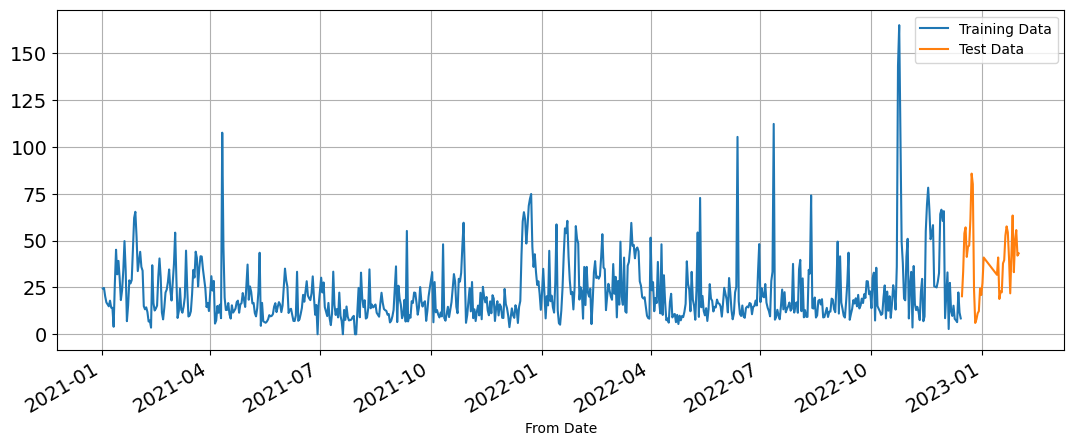

In [ ]:
train_PM25['PM2.5'].plot(figsize=(13,5), fontsize=14)
test_PM25['PM2.5'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df1 = df.copy()
    df1['dayofweek'] = df1.index.dayofweek
    df1['quarter'] = df1.index.quarter
    df1['month'] = df1.index.month
    df1['year'] = df1.index.year
    df1['dayofyear'] = df1.index.dayofyear
    df1['dayofmonth'] = df1.index.day
    df1['weekofyear'] = df1.index.isocalendar().week
    return df1

df1 = create_features(df_PM25)

In [ ]:
train_xgb = create_features(train_PM25.copy())
test_xgb = create_features(test_PM25.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PM2.5'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_PM25=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_PM25.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:21.69396	validation_1-rmse:32.36084
[25]	validation_0-rmse:6.03355	validation_1-rmse:16.34809
[50]	validation_0-rmse:3.92916	validation_1-rmse:16.94458
[60]	validation_0-rmse:3.19133	validation_1-rmse:16.96527


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

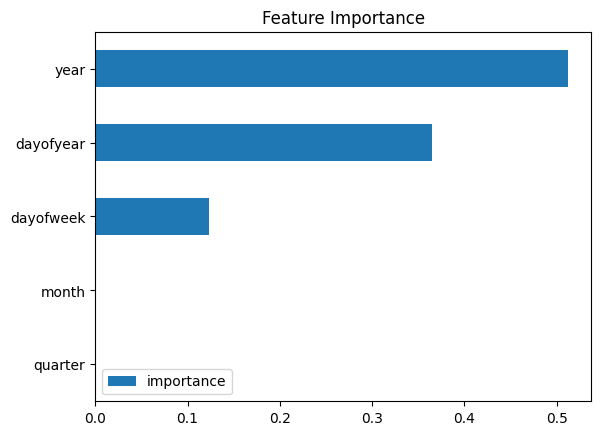

In [ ]:
fi_PM25 = pd.DataFrame(data=reg_PM25.feature_importances_,
             index=reg_PM25.feature_names_in_,
             columns=['importance'])
fi_PM25.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test_xgb['prediction_PM25'] = reg_PM25.predict(X_test)
df1 = df1.merge(test_xgb[['prediction_PM25']], how='left', left_index=True, right_index=True)

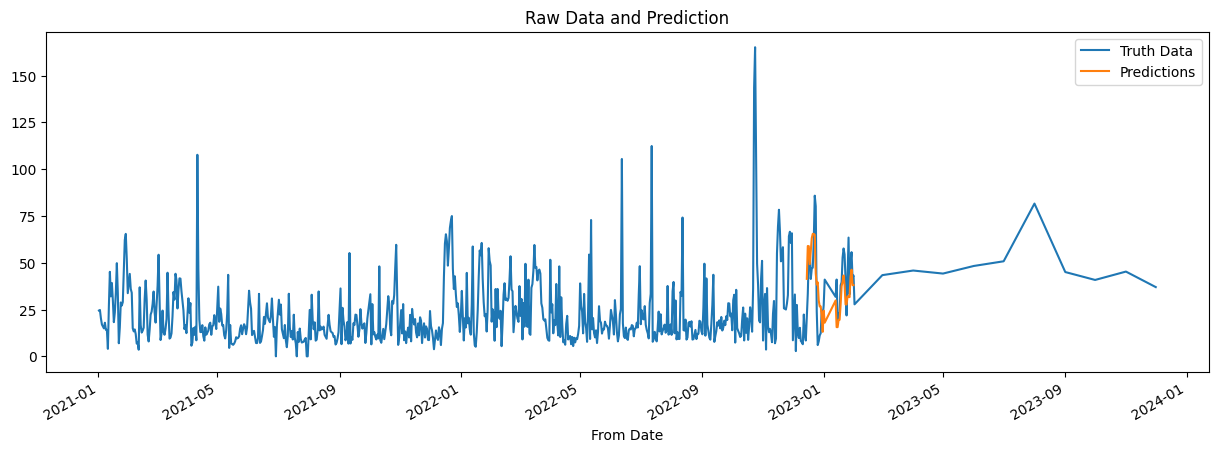

In [ ]:
ax = df_PM25[['PM2.5']].plot(figsize=(15, 5))
df1['prediction_PM25'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **4) Evaluation**

In [ ]:
print(df_PM25.max())
print(df_PM25.min())

PM2.5    165.14
dtype: float64
PM2.5    0.0
dtype: float64


In [ ]:
rmse_modelPM25_test = metrics.mean_squared_error(test_xgb['PM2.5'], test_xgb['prediction_PM25'],squared=False)
print("For PM2.5 forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelPM25_test))

For PM2.5 forecast on the Test Data,  RMSE is 15.833


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_modelPM25_test], 'Max':[165],'Min':[0], 'Error %':[ (rmse_modelPM25_test*100)/(165.14) ]},index=['PM2.5'])
resultsDf

Test RMSE  Max  Min  Error %
PM2.5  15.833343  165    0  9.58783

# 2) PM 10

## **2.1) Visualization**

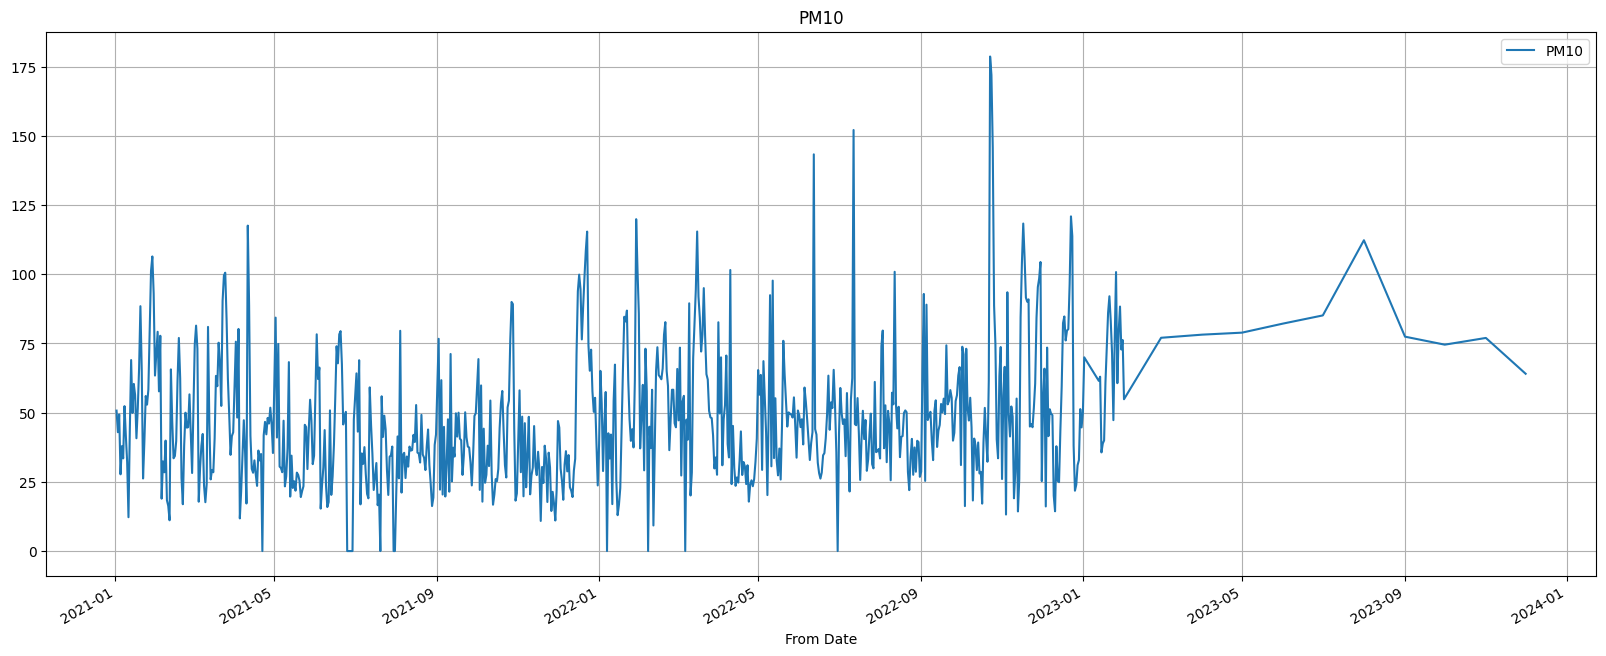

In [ ]:
df_PM10.plot(figsize=(20,8))
plt.title("PM10")
plt.grid();

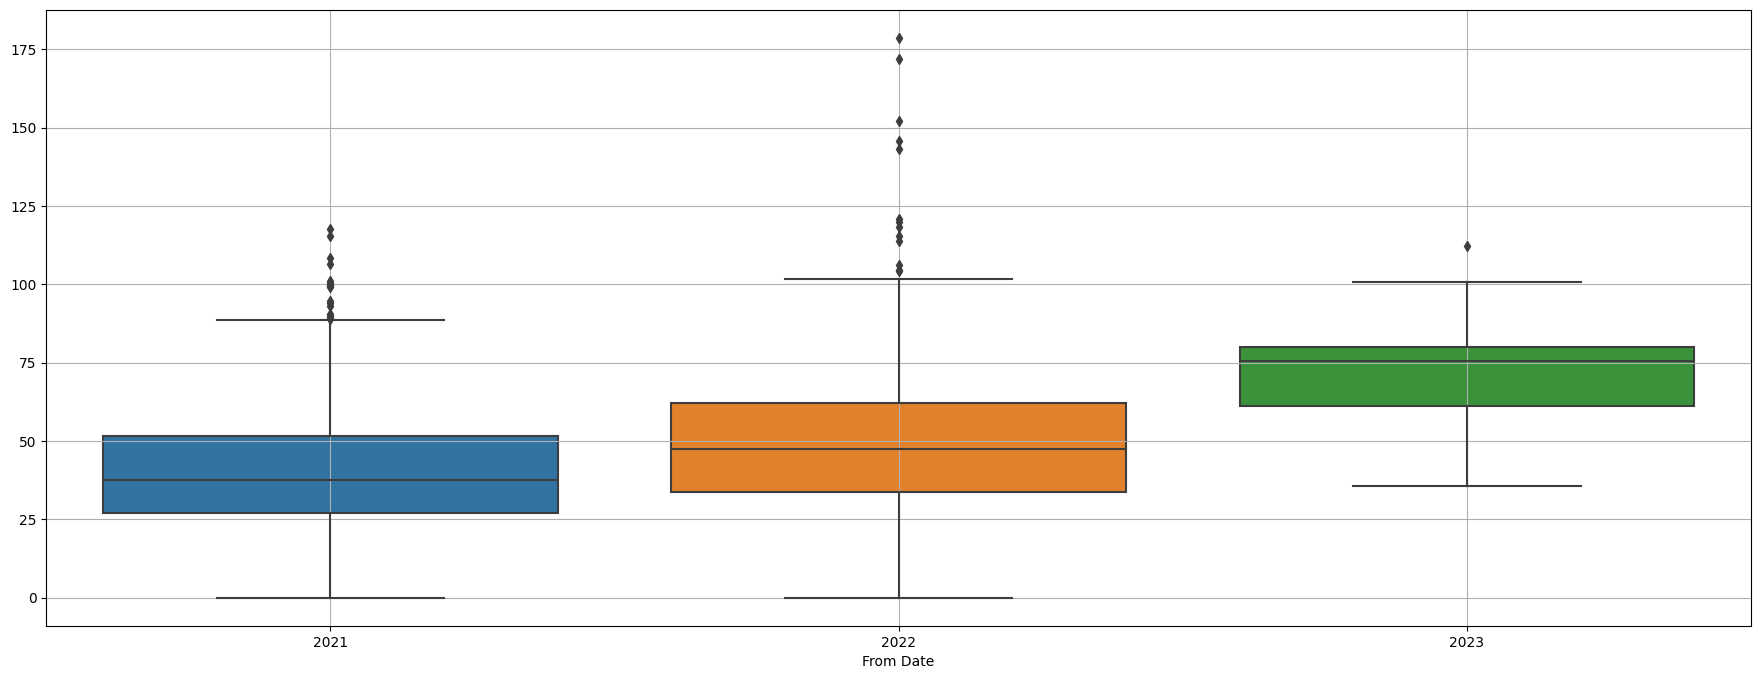

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_PM10.index.year,y = df_PM10.values[:,0],ax=ax)
plt.grid();

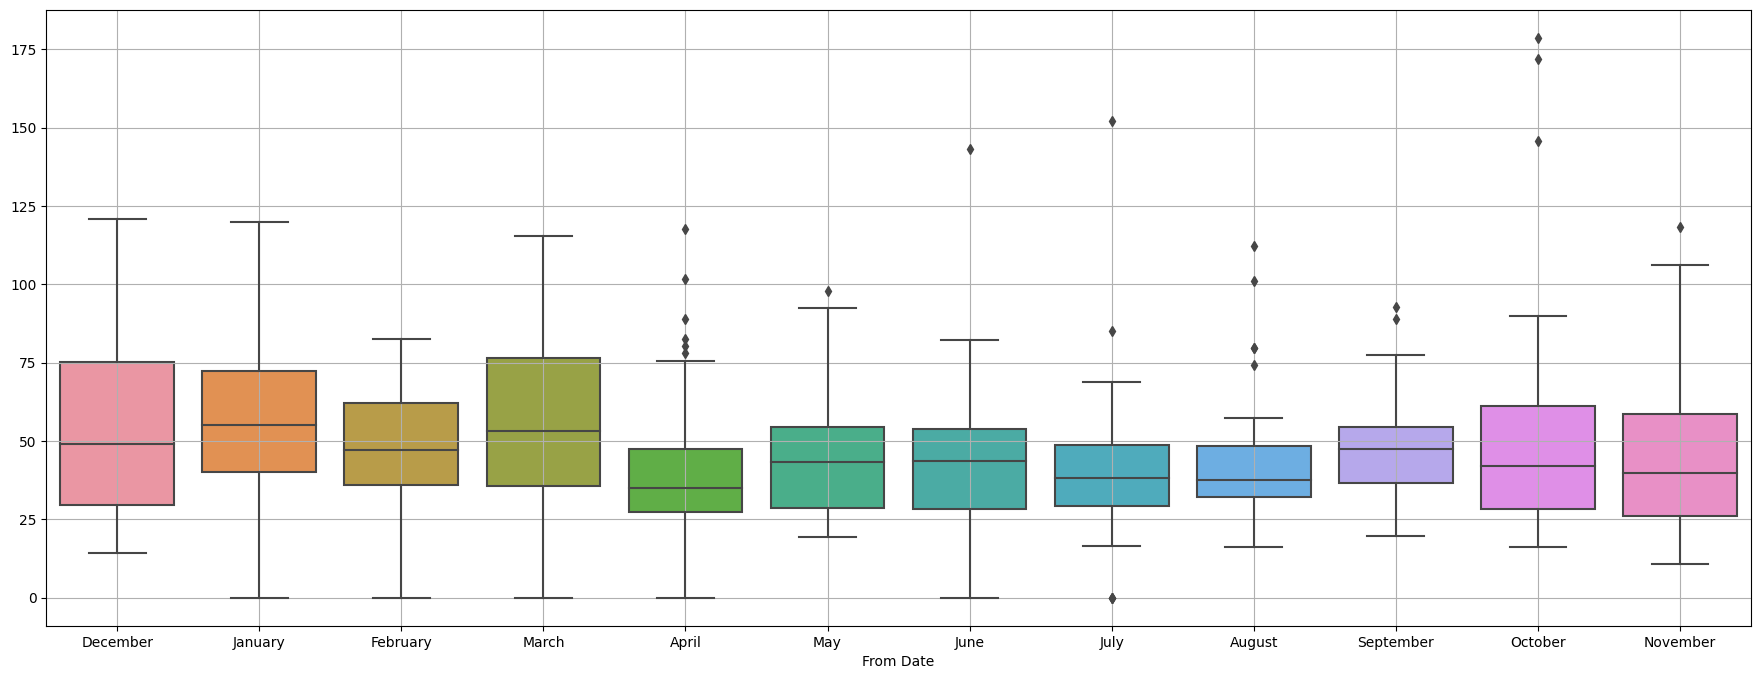

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_PM10.index.month_name(),y = df_PM10.values[:,0],ax=ax)
plt.grid();

## **2.2) Train Test Split**

In [ ]:
train_PM10 = df_PM10[df_PM10.index<'2022-12-15']
test_PM10  = df_PM10[(df_PM10.index>='2022-12-15') & (df_PM10.index < '2023-02-01')]
print(train_PM10.shape)
print(test_PM10.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_PM10.head(),'\n')
print('Last few rows of Training Data','\n',train_PM10.tail(),'\n')
print('First few rows of Test Data','\n',test_PM10.head(),'\n')
print('Last few rows of Test Data','\n',test_PM10.tail(),'\n')

First few rows of Training Data 
              PM10
From Date        
2021-12-01  46.97
2021-01-13  69.01
2021-01-14  49.90
2021-01-15  60.39
2021-01-16  56.37 

Last few rows of Training Data 
              PM10
From Date        
2022-10-12  38.18
2022-11-12  55.09
2022-12-12  37.87
2022-12-13  25.34
2022-12-14  24.90 

First few rows of Test Data 
              PM10
From Date        
2022-12-15  43.46
2022-12-16  59.43
2022-12-17  82.36
2022-12-18  84.76
2022-12-19  76.09 

Last few rows of Test Data 
              PM10
From Date        
2023-01-28  79.36
2023-01-29  88.34
2023-01-30  72.82
2023-01-31  76.24
2023-01-02  70.00 



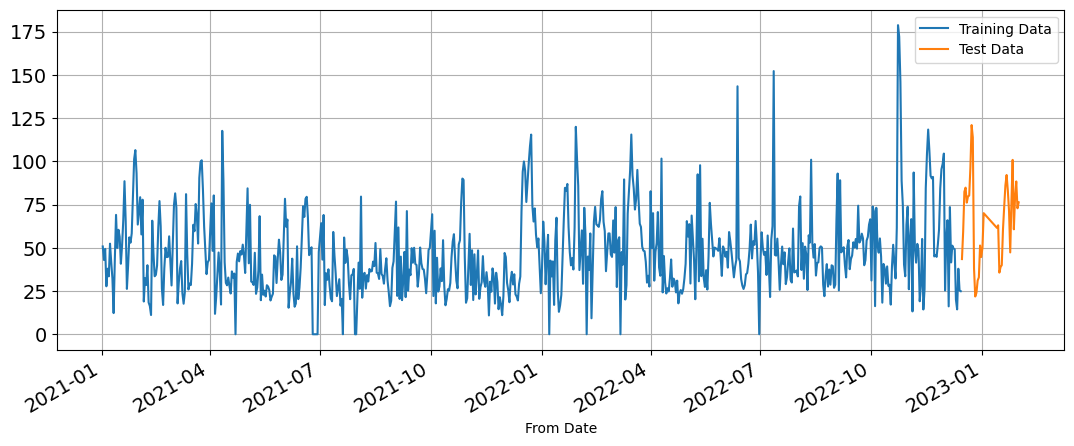

In [ ]:
train_PM10['PM10'].plot(figsize=(13,5), fontsize=14)
test_PM10['PM10'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **2.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df2 = df.copy()
    df2['dayofweek'] = df2.index.dayofweek
    df2['quarter'] = df2.index.quarter
    df2['month'] = df2.index.month
    df2['year'] = df2.index.year
    df2['dayofyear'] = df2.index.dayofyear
    df2['dayofmonth'] = df2.index.day
    df2['weekofyear'] = df2.index.isocalendar().week
    return df2

df2 = create_features(df_PM10)

In [ ]:
train_xgb = create_features(train_PM10.copy())
test_xgb = create_features(test_PM10.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PM10'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_PM10=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_PM10.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:39.01665	validation_1-rmse:59.83788
[25]	validation_0-rmse:10.21535	validation_1-rmse:21.75710
[50]	validation_0-rmse:7.10987	validation_1-rmse:21.86234
[61]	validation_0-rmse:6.14731	validation_1-rmse:21.91808


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

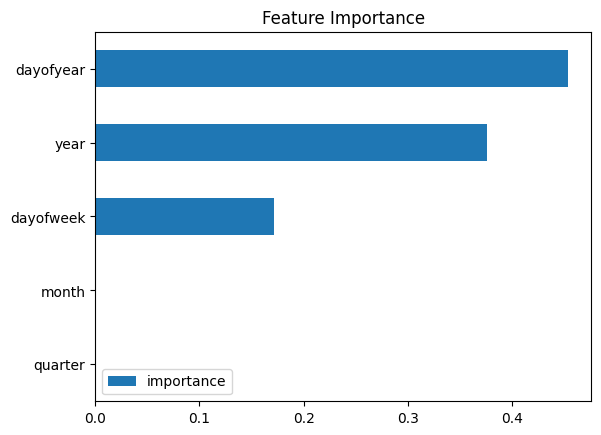

In [ ]:
fi_PM10 = pd.DataFrame(data=reg_PM10.feature_importances_,
             index=reg_PM10.feature_names_in_,
             columns=['importance'])
fi_PM10.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test_xgb['prediction_PM10'] = reg_PM10.predict(X_test)
df2 = df2.merge(test_xgb[['prediction_PM10']], how='left', left_index=True, right_index=True)

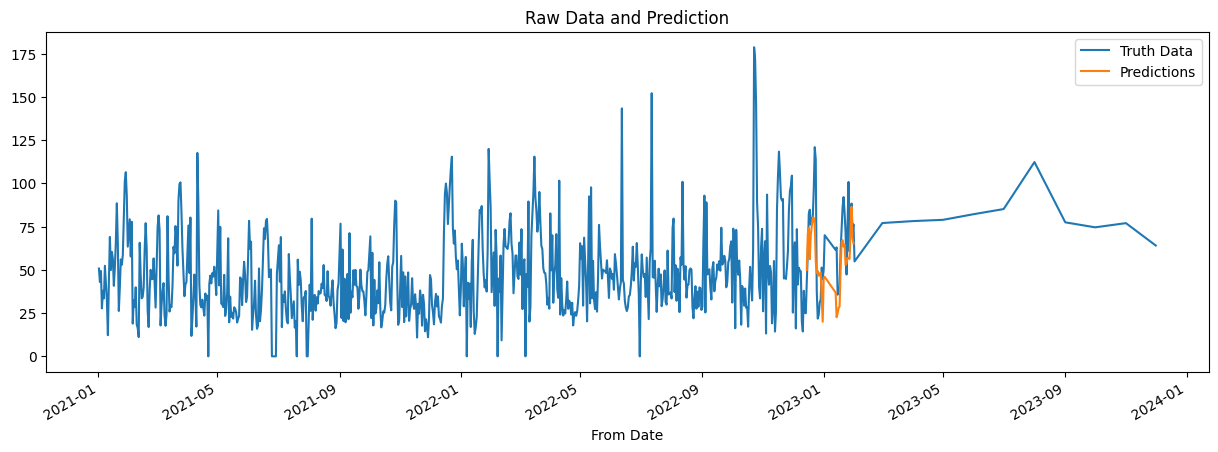

In [ ]:
ax = df_PM10[['PM10']].plot(figsize=(15, 5))
df2['prediction_PM10'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **2.4) Evaluation**

In [ ]:
print(df_PM10.max())
print(df_PM10.min())
# , 'Max':[165],'Min':[0]

PM10    178.68
dtype: float64
PM10    0.0
dtype: float64


In [ ]:
rmse_modelPM10_test = metrics.mean_squared_error(test_xgb['PM10'], test_xgb['prediction_PM10'],squared=False)
print("For PM10 forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelPM10_test))

For PM10 forecast on the Test Data,  RMSE is 21.394


In [ ]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_modelPM10_test], 'Max':[178],'Min':[0], 'Error %':[ (rmse_modelPM10_test*100)/(178.68) ]},index=['PM10'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5  15.833343  165    0   9.587830
PM10   21.393969  178    0  11.973343

# 3) NO2

## **3.1 Visualization**

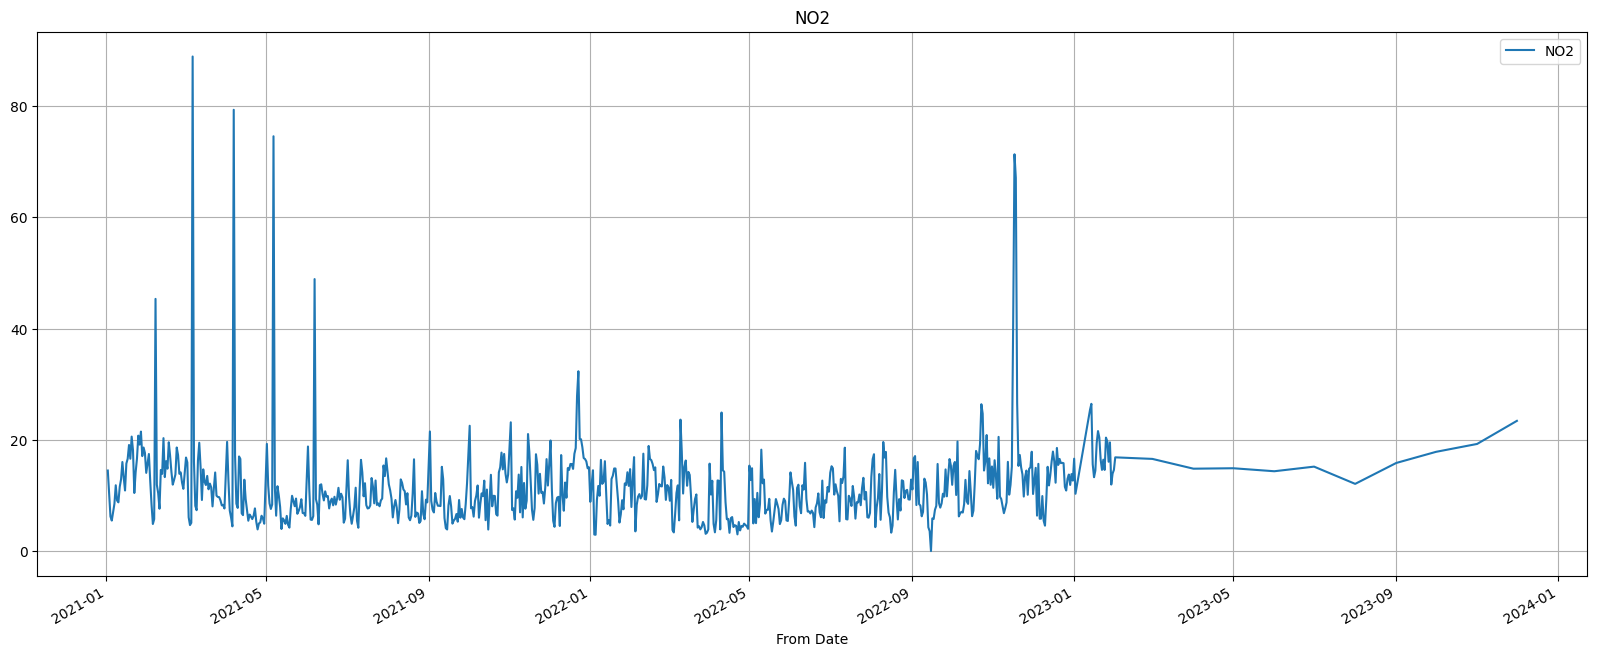

In [ ]:
df_NO2.plot(figsize=(20,8))
plt.title("NO2")
plt.grid();

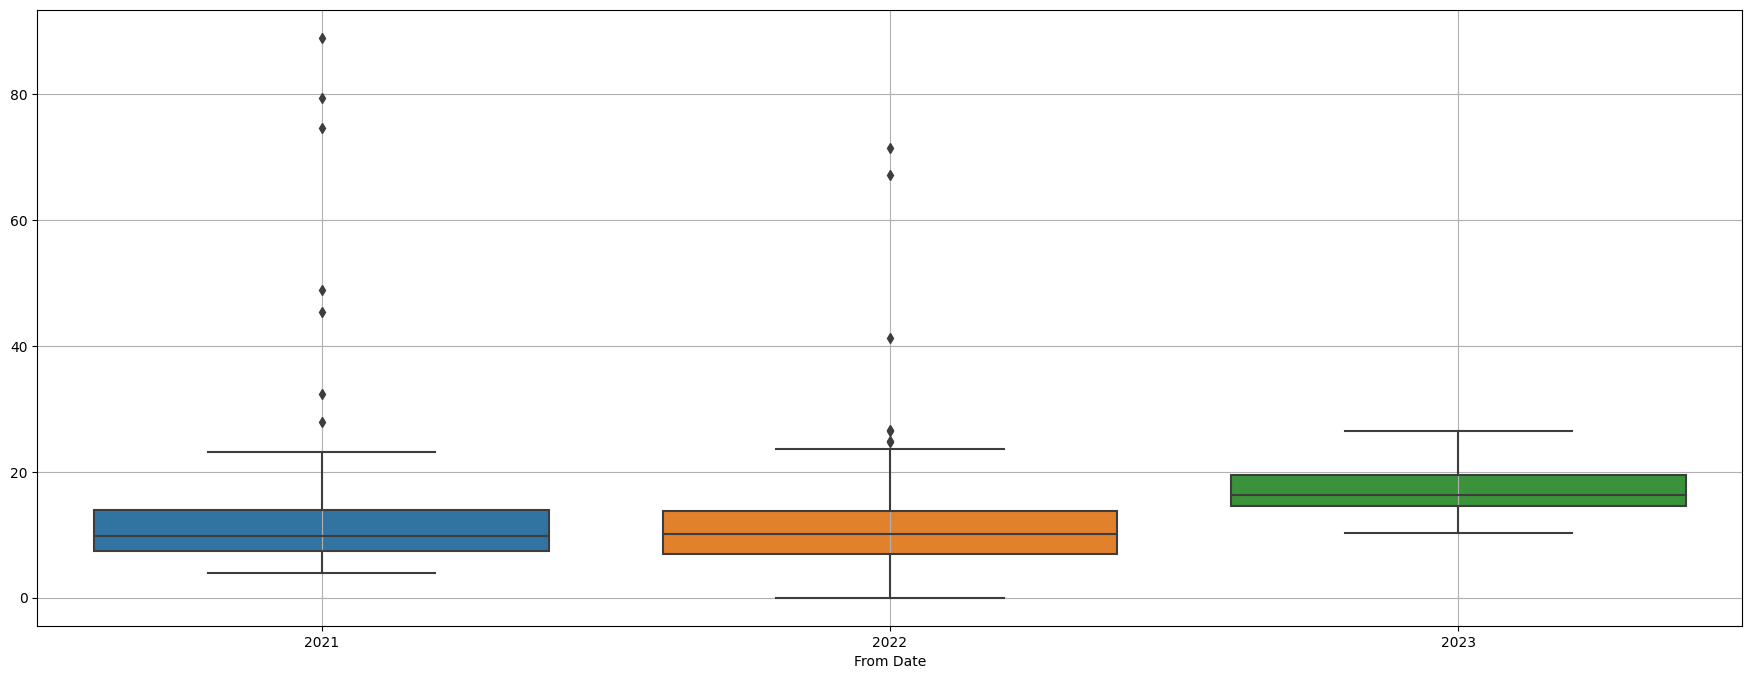

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_NO2.index.year,y = df_NO2.values[:,0],ax=ax)
plt.grid();

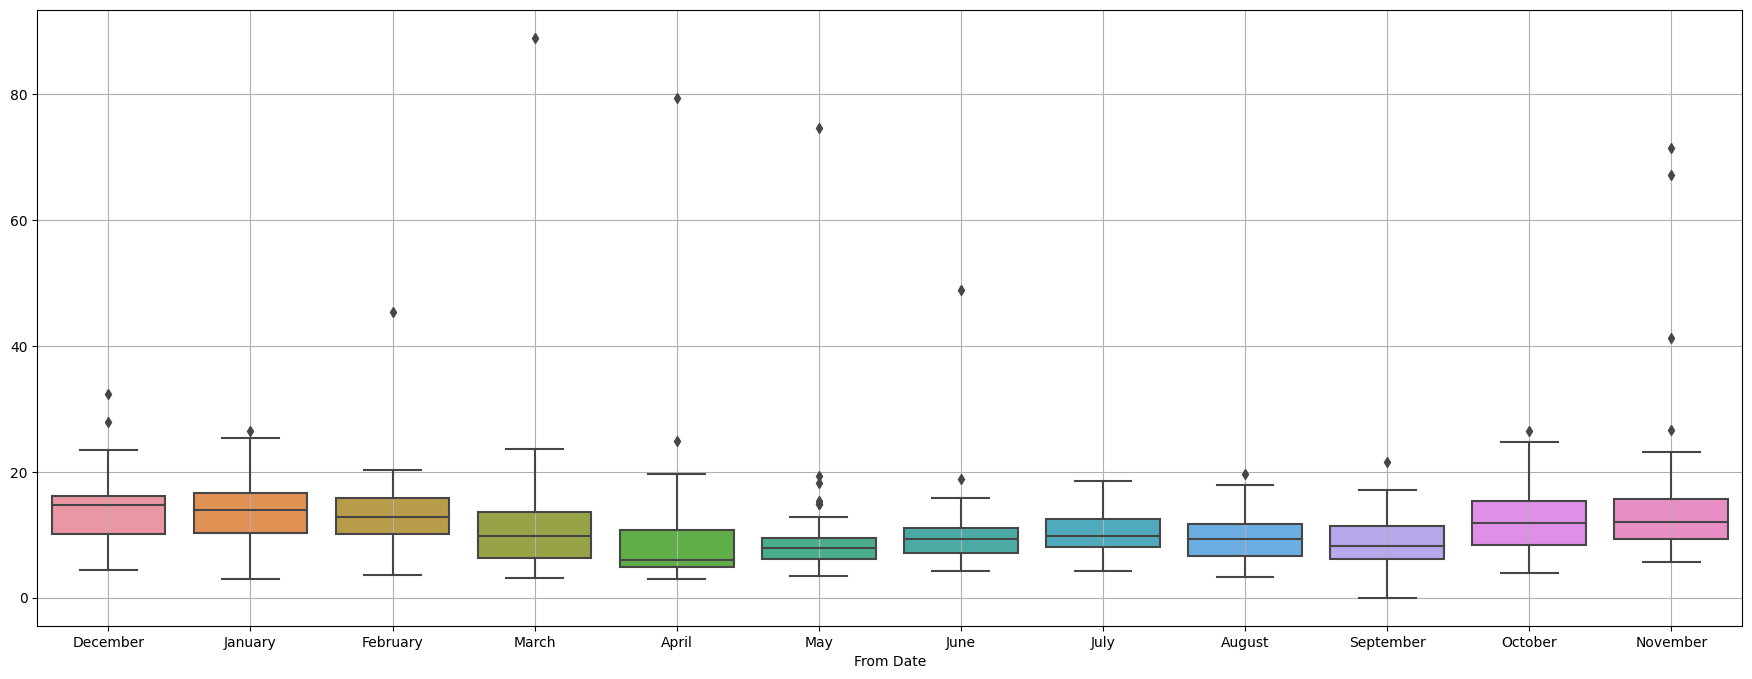

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_NO2.index.month_name(),y = df_NO2.values[:,0],ax=ax)
plt.grid();

## **3.1 Train Test Split**

In [ ]:
train_NO2 = df_NO2[df_NO2.index<'2022-12-15']
test_NO2  = df_NO2[(df_NO2.index>='2022-12-15') & (df_NO2.index < '2023-02-01')]
print(train_NO2.shape)
print(test_NO2.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_NO2.head(),'\n')
print('Last few rows of Training Data','\n',train_NO2.tail(),'\n')
print('First few rows of Test Data','\n',test_NO2.head(),'\n')
print('Last few rows of Test Data','\n',test_NO2.tail(),'\n')

First few rows of Training Data 
               NO2
From Date        
2021-12-01  15.62
2021-01-13  16.01
2021-01-14  13.24
2021-01-15  10.89
2021-01-16  15.73 

Last few rows of Training Data 
               NO2
From Date        
2022-10-12   8.92
2022-11-12  16.04
2022-12-12  15.15
2022-12-13  11.80
2022-12-14  13.66 

First few rows of Test Data 
               NO2
From Date        
2022-12-15  16.06
2022-12-16  17.89
2022-12-17  16.15
2022-12-18  12.29
2022-12-19  18.54 

Last few rows of Test Data 
               NO2
From Date        
2023-01-28  19.54
2023-01-29  11.96
2023-01-30  13.93
2023-01-31  14.60
2023-01-02  10.30 



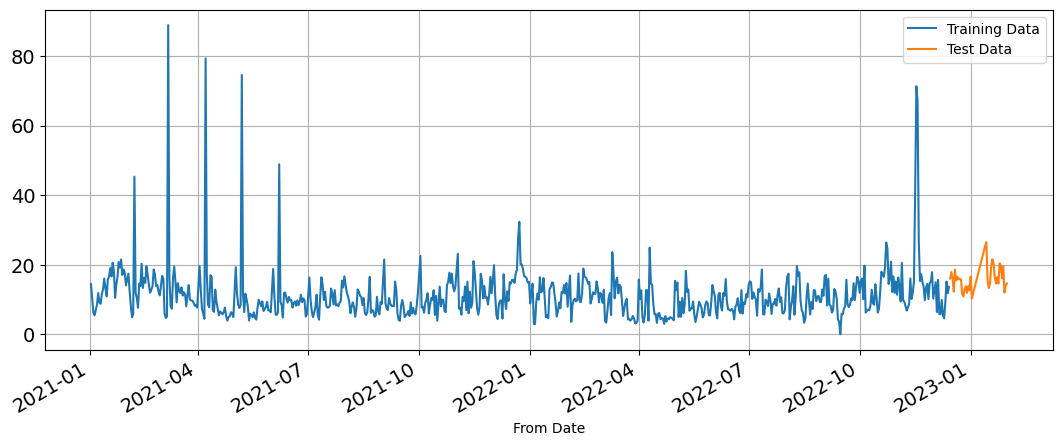

In [ ]:
train_NO2['NO2'].plot(figsize=(13,5), fontsize=14)
test_NO2['NO2'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **3.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df3 = df.copy()
    df3['dayofweek'] = df3.index.dayofweek
    df3['quarter'] = df3.index.quarter
    df3['month'] = df3.index.month
    df3['year'] = df3.index.year
    df3['dayofyear'] = df3.index.dayofyear
    df3['dayofmonth'] = df3.index.day
    df3['weekofyear'] = df3.index.isocalendar().week
    return df3

df3 = create_features(df_PM25)

In [ ]:
train_xgb = create_features(train_NO2.copy())
test_xgb = create_features(test_NO2.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'NO2'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_NO2=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_NO2.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:10.15427	validation_1-rmse:12.89460
[25]	validation_0-rmse:2.42324	validation_1-rmse:6.60426
[50]	validation_0-rmse:1.55216	validation_1-rmse:6.92691
[62]	validation_0-rmse:1.22868	validation_1-rmse:6.93255


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

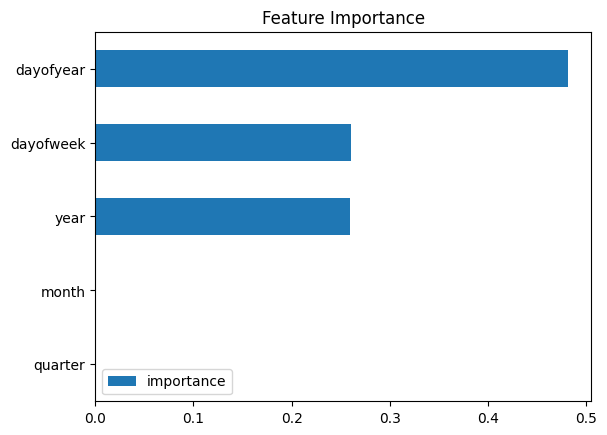

In [ ]:
fi_NO2 = pd.DataFrame(data=reg_NO2.feature_importances_,
             index=reg_NO2.feature_names_in_,
             columns=['importance'])
fi_NO2.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

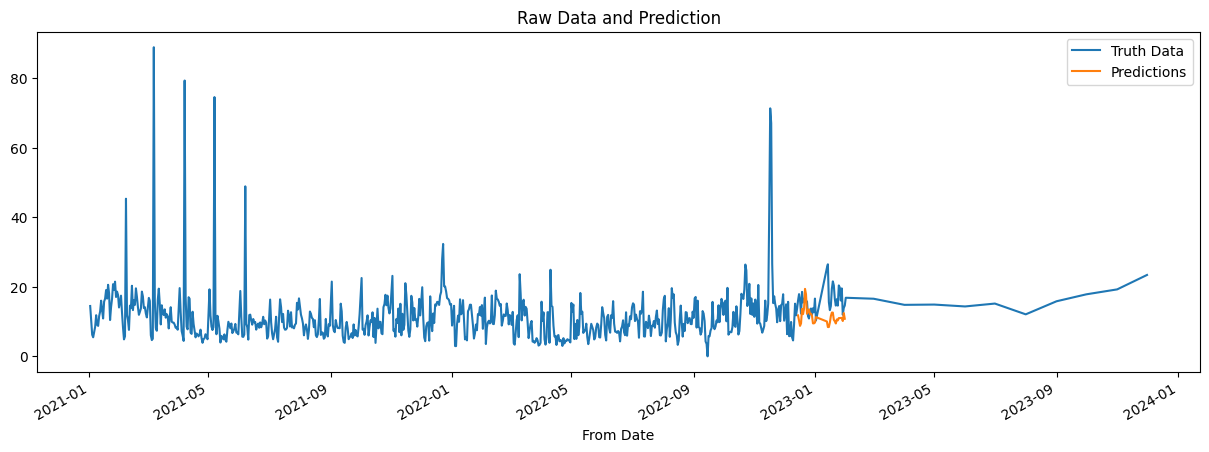

In [ ]:
test_xgb['prediction_NO2'] = reg_NO2.predict(X_test)
df3 = df3.merge(test_xgb[['prediction_NO2']], how='left', left_index=True, right_index=True)
ax = df_NO2[['NO2']].plot(figsize=(15, 5))
df3['prediction_NO2'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **3.4) Evaluation**

In [ ]:
print(df_NO2.max())
print(df_NO2.min())
# , 'Max':[165],'Min':[0]

NO2    88.92
dtype: float64
NO2    0.0
dtype: float64


In [ ]:
rmse_modelNO2_test = metrics.mean_squared_error(test_xgb['NO2'], test_xgb['prediction_NO2'],squared=False)
print("For NO2 forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelNO2_test))

For NO2 forecast on the Test Data,  RMSE is 6.416


In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_modelNO2_test], 'Max':[89],'Min':[0], 'Error %':[ (rmse_modelNO2_test*100)/(88.92) ]},index=['NO2'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5  15.833343  165    0   9.587830
PM10   21.393969  178    0  11.973343
NO2     6.416283   89    0   7.215792

# 4) NOx

## **4.1 Visualization**

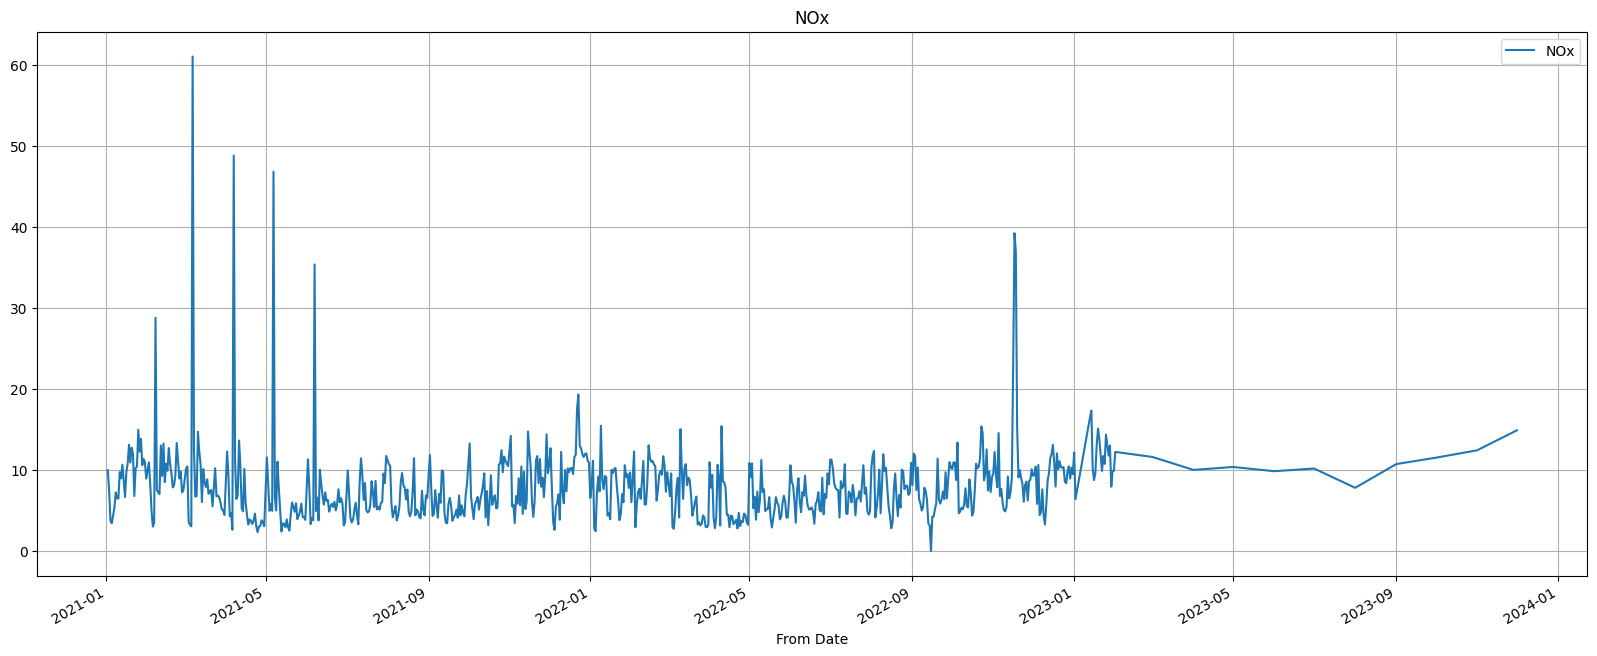

In [ ]:
df_NOx.plot(figsize=(20,8))
plt.title("NOx")
plt.grid();

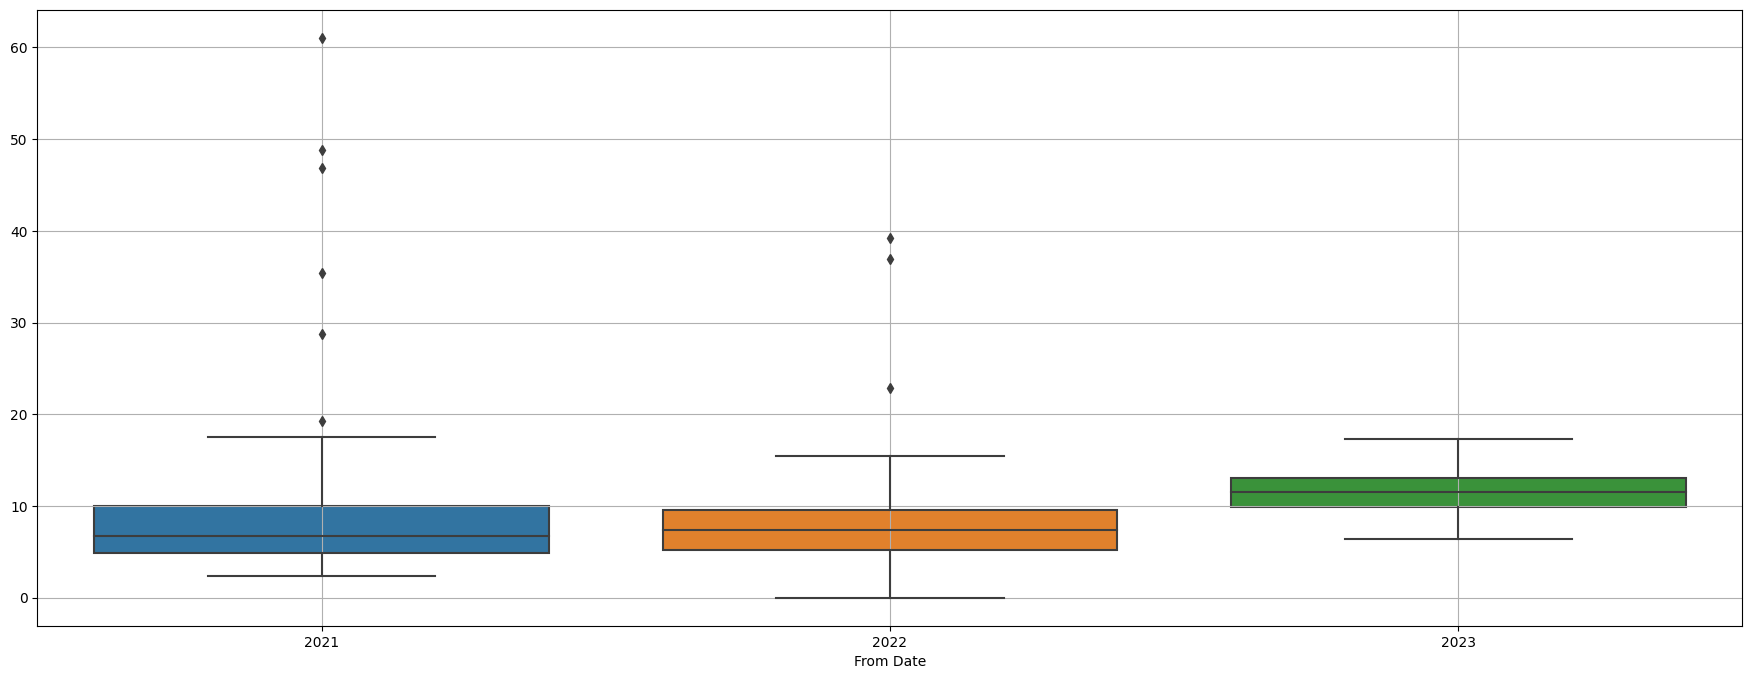

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_NOx.index.year,y = df_NOx.values[:,0],ax=ax)
plt.grid();

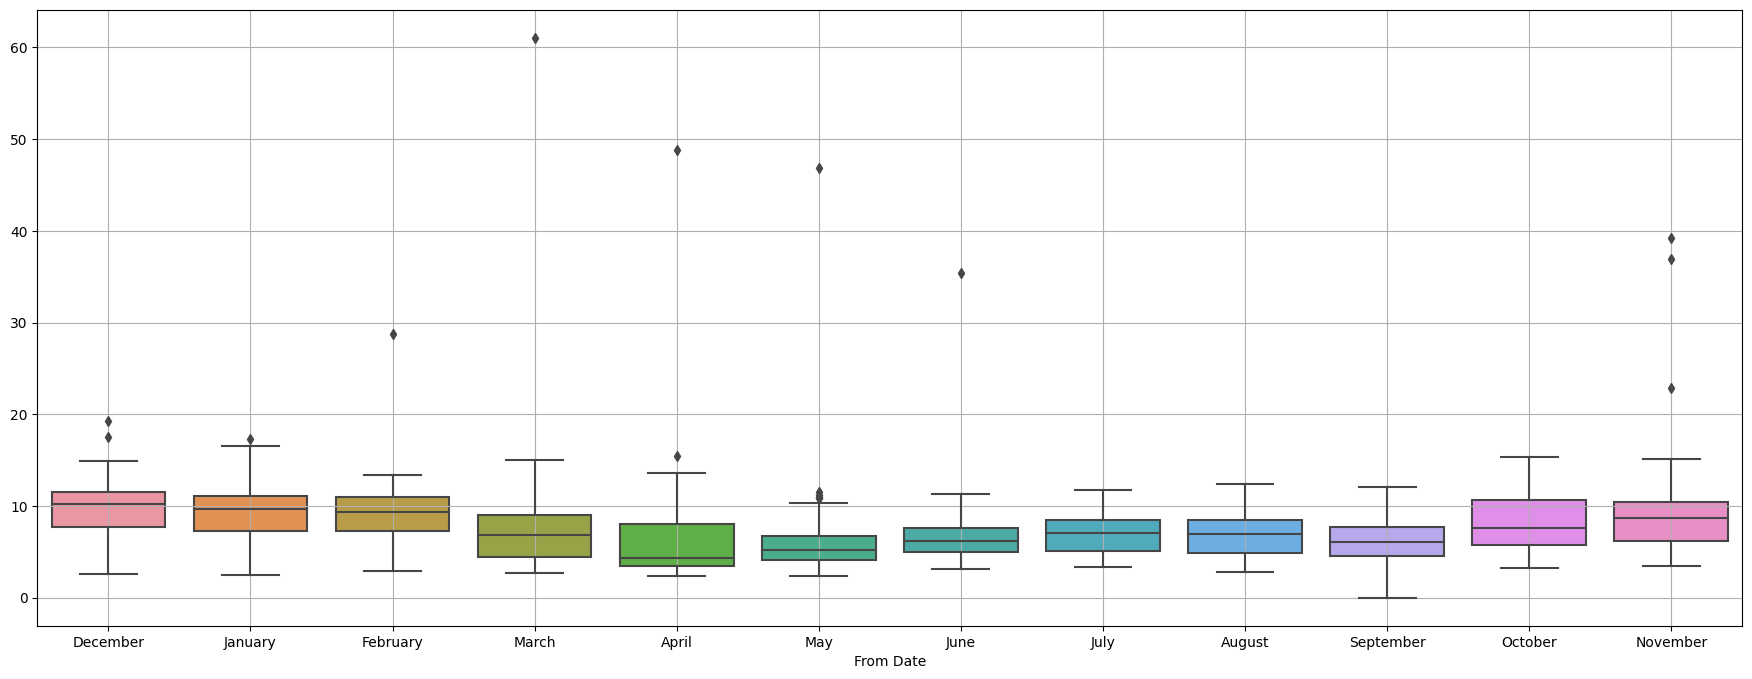

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_NOx.index.month_name(),y = df_NOx.values[:,0],ax=ax)
plt.grid();

## **4.2 Train Test Split**

In [ ]:
train_NOx = df_NOx[df_NOx.index<'2022-12-15']
test_NOx  = df_NOx[(df_NOx.index>='2022-12-15') & (df_NOx.index < '2023-02-01')]
print(train_NOx.shape)
print(test_NOx.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_NOx.head(),'\n')
print('Last few rows of Training Data','\n',train_NOx.tail(),'\n')
print('First few rows of Test Data','\n',test_NOx.head(),'\n')
print('Last few rows of Test Data','\n',test_NOx.tail(),'\n')

First few rows of Training Data 
               NOx
From Date        
2021-12-01  10.59
2021-01-13  10.66
2021-01-14   8.60
2021-01-15   6.67
2021-01-16   9.79 

Last few rows of Training Data 
               NOx
From Date        
2022-10-12   5.55
2022-11-12   9.21
2022-12-12   8.73
2022-12-13   9.62
2022-12-14  11.46 

First few rows of Test Data 
               NOx
From Date        
2022-12-15  12.01
2022-12-16  13.10
2022-12-17  10.84
2022-12-18   7.96
2022-12-19  12.06 

Last few rows of Test Data 
               NOx
From Date        
2023-01-28  13.03
2023-01-29   7.95
2023-01-30   9.89
2023-01-31   9.90
2023-01-02   6.40 



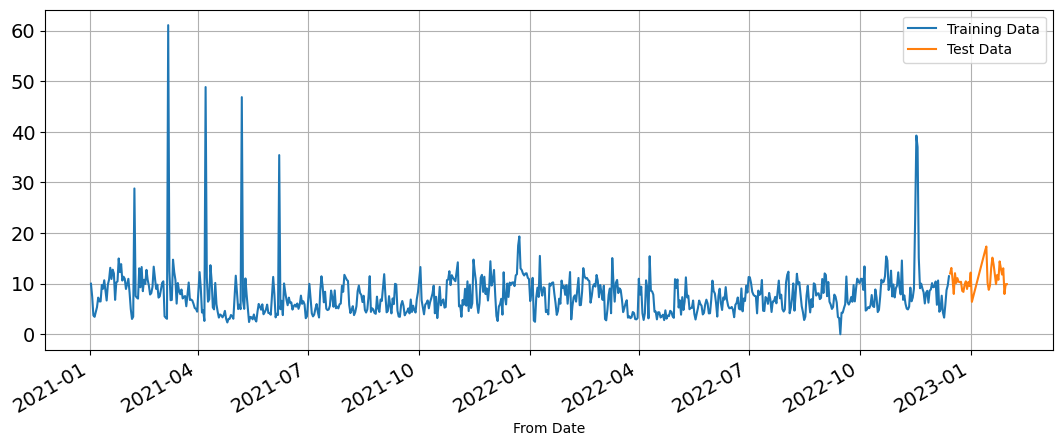

In [ ]:
train_NOx['NOx'].plot(figsize=(13,5), fontsize=14)
test_NOx['NOx'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **4.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df4 = df.copy()
    df4['dayofweek'] = df4.index.dayofweek
    df4['quarter'] = df4.index.quarter
    df4['month'] = df4.index.month
    df4['year'] = df4.index.year
    df4['dayofyear'] = df4.index.dayofyear
    df4['dayofmonth'] = df4.index.day
    df4['weekofyear'] = df4.index.isocalendar().week
    return df4

df4 = create_features(df_NOx)

In [ ]:
train_xgb = create_features(train_NOx.copy())
test_xgb = create_features(test_NOx.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'NOx'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_NOx=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_NOx.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:6.68633	validation_1-rmse:8.38495
[25]	validation_0-rmse:1.60894	validation_1-rmse:4.39653
[50]	validation_0-rmse:0.96946	validation_1-rmse:4.59164
[58]	validation_0-rmse:0.88038	validation_1-rmse:4.62353


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

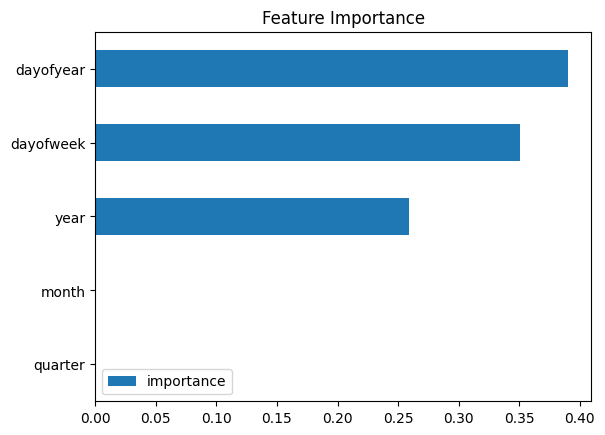

In [ ]:
fi_NOx = pd.DataFrame(data=reg_NOx.feature_importances_,
             index=reg_NOx.feature_names_in_,
             columns=['importance'])
fi_NOx.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

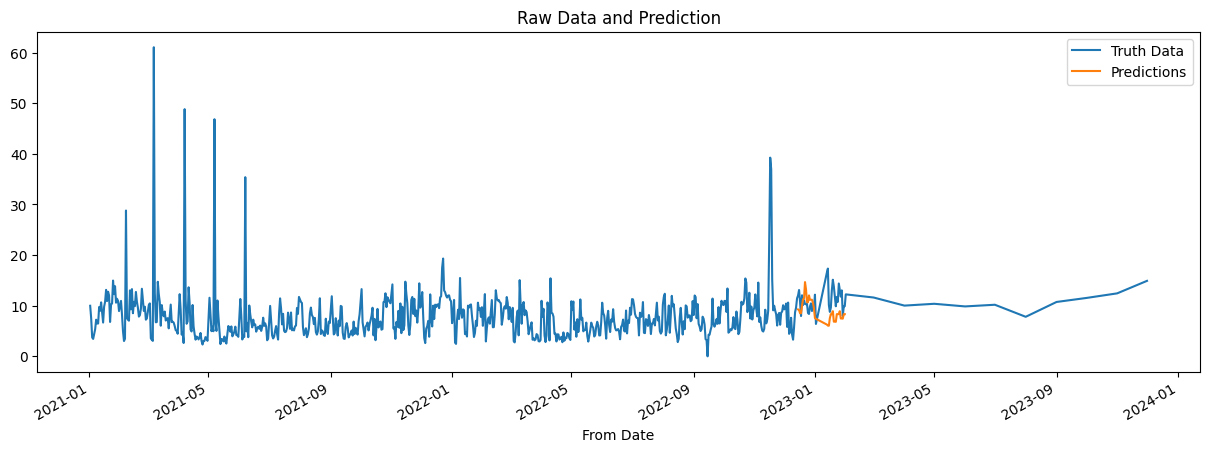

In [ ]:
test_xgb['prediction_NOx'] = reg_NOx.predict(X_test)
df4 = df4.merge(test_xgb[['prediction_NOx']], how='left', left_index=True, right_index=True)
ax = df_NOx[['NOx']].plot(figsize=(15, 5))
df4['prediction_NOx'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **4.4) Evaluation**

In [ ]:
print(df_NOx.max())
print(df_NOx.min())
# , 'Max':[165],'Min':[0]

NOx    61.06
dtype: float64
NOx    0.0
dtype: float64


In [ ]:
rmse_modelNOx_test = metrics.mean_squared_error(test_xgb['NOx'], test_xgb['prediction_NOx'],squared=False)
print("For NOx forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelNOx_test))

For NOx forecast on the Test Data,  RMSE is 4.079


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_modelNOx_test], 'Max':[62],'Min':[0], 'Error %':[ (rmse_modelNOx_test*100)/(61.06) ]},index=['NOx'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5  15.833343  165    0   9.587830
PM10   21.393969  178    0  11.973343
NO2     6.416283   89    0   7.215792
NOx     4.078854   62    0   6.680076

# 5) NH3

## **5.1 Visualization**

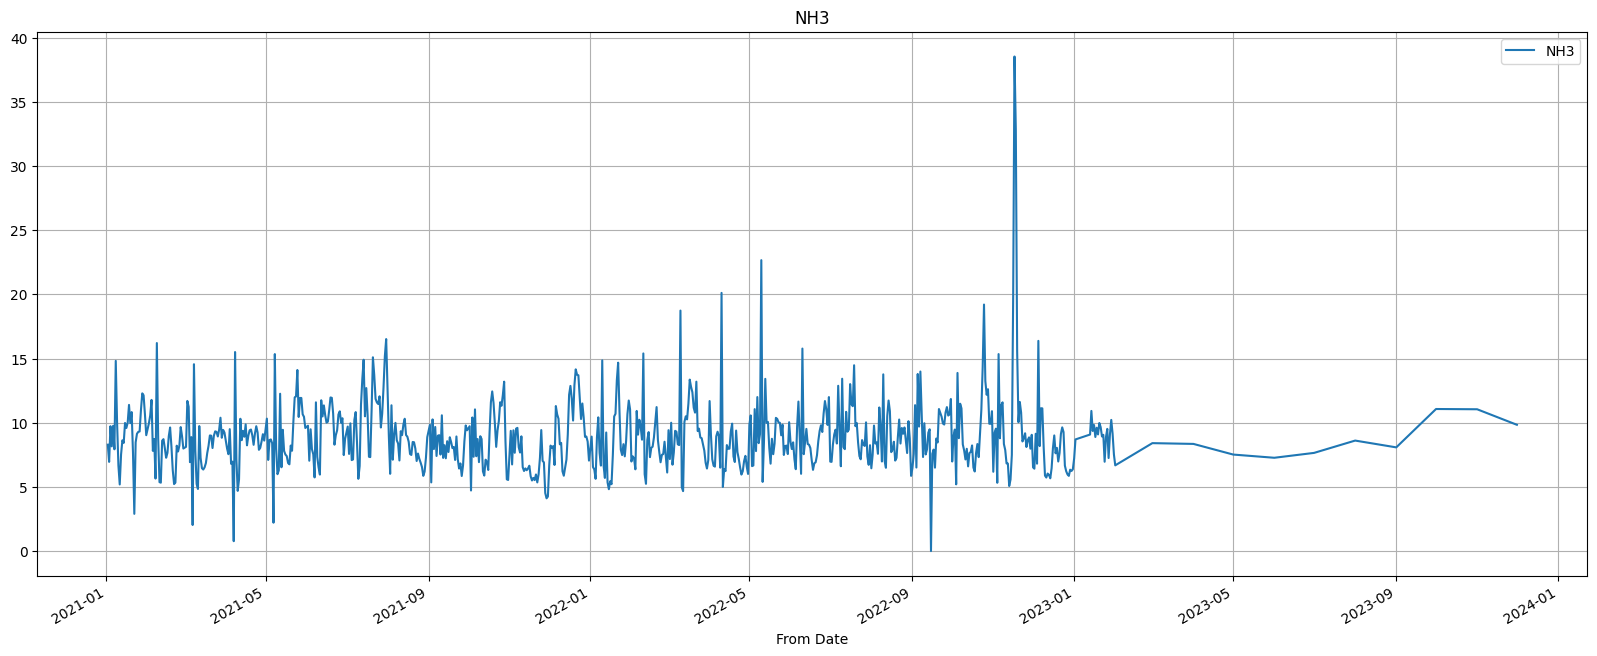

In [ ]:
df_NH3.plot(figsize=(20,8))
plt.title("NH3")
plt.grid();

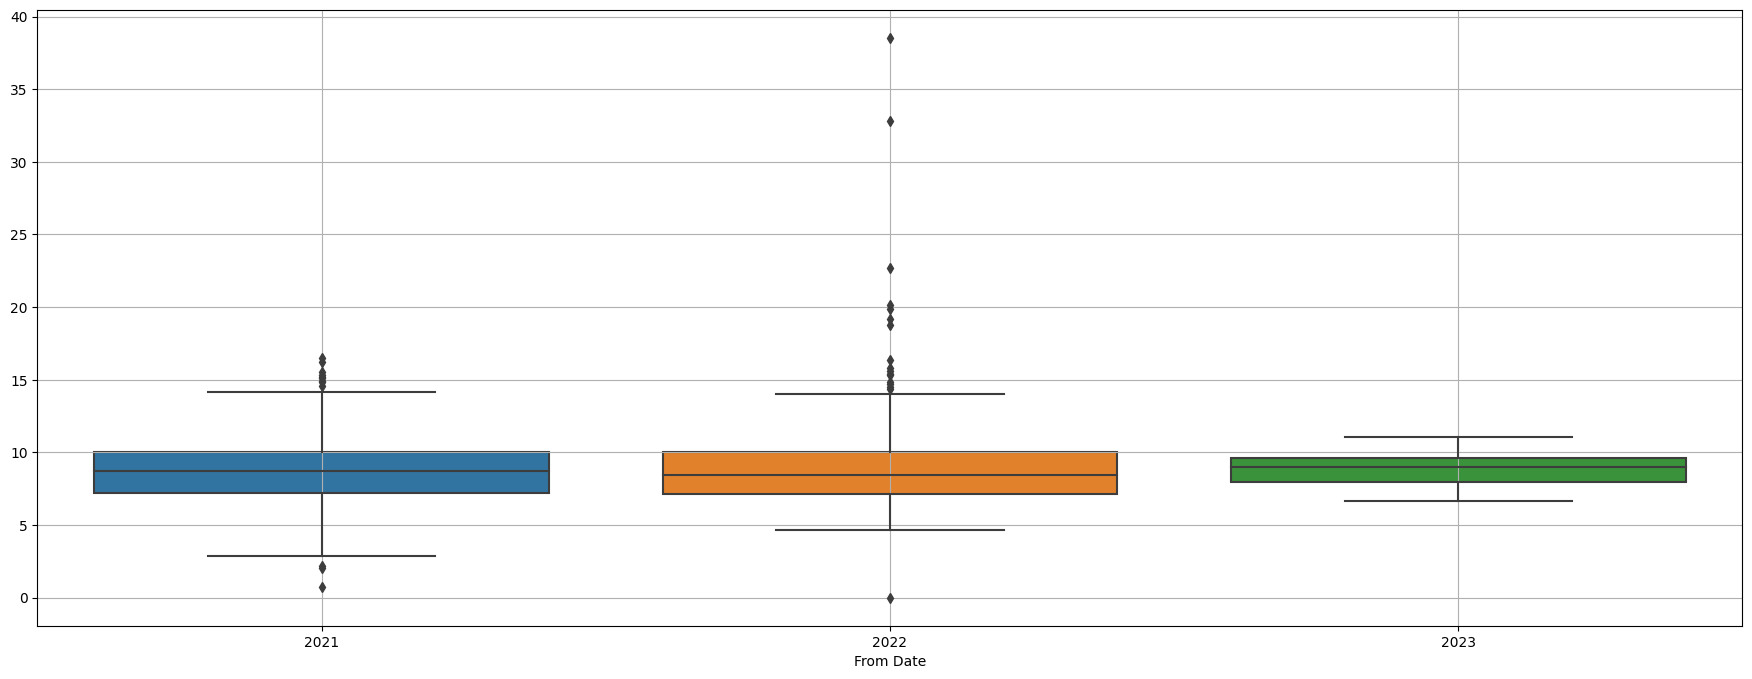

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_NH3.index.year,y = df_NH3.values[:,0],ax=ax)
plt.grid();

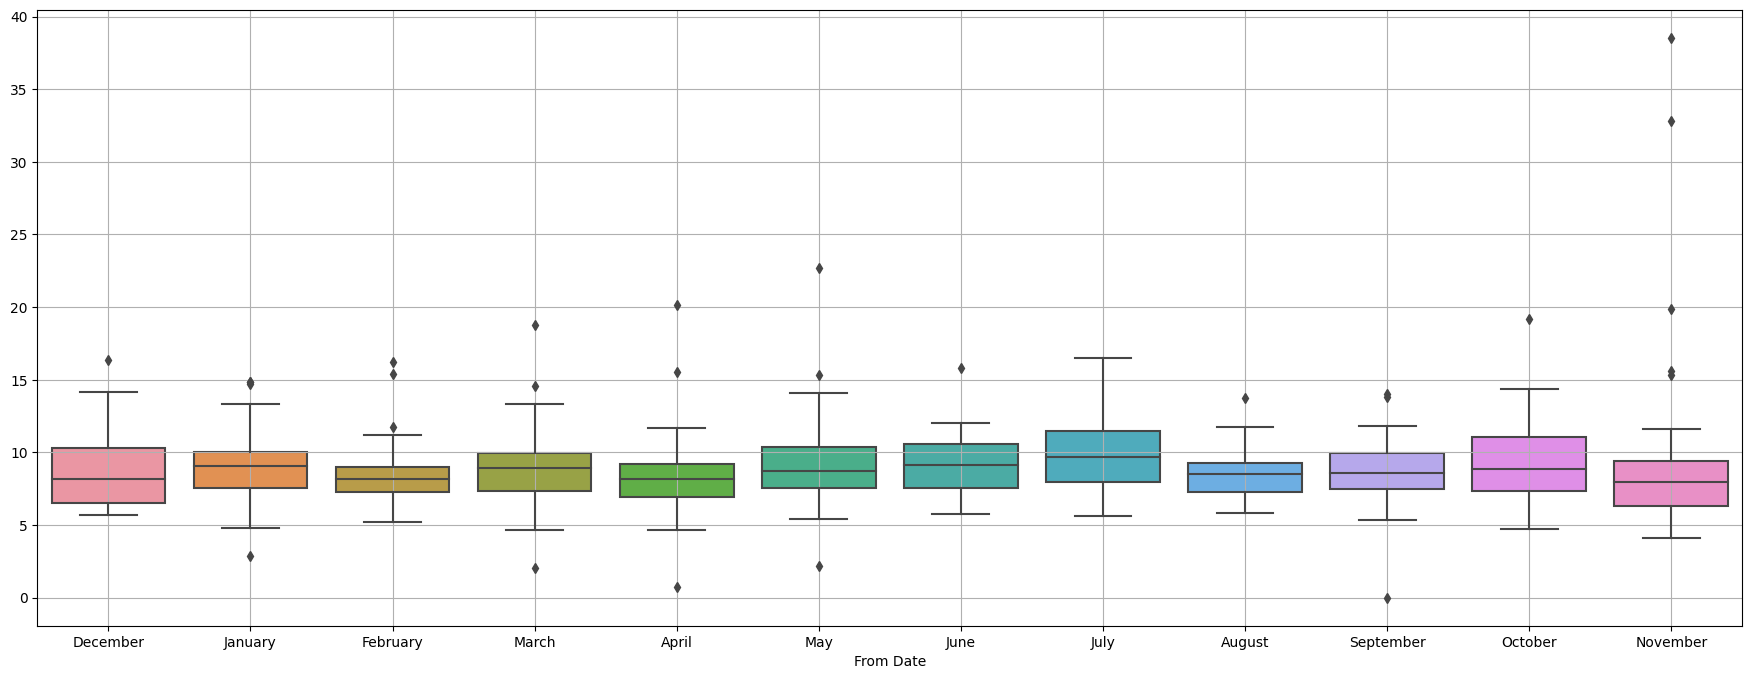

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_NH3.index.month_name(),y = df_NH3.values[:,0],ax=ax)
plt.grid();

## **5.1 Train Test Split**

In [ ]:
train_NH3 = df_NH3[df_NH3.index<'2022-12-15']
test_NH3  = df_NH3[(df_NH3.index>='2022-12-15') & (df_NH3.index < '2023-02-01')]
print(train_NH3.shape)
print(test_NH3.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_NH3.head(),'\n')
print('Last few rows of Training Data','\n',train_NH3.tail(),'\n')
print('First few rows of Test Data','\n',test_NH3.head(),'\n')
print('Last few rows of Test Data','\n',test_NH3.tail(),'\n')

First few rows of Training Data 
              NH3
From Date       
2021-12-01  6.67
2021-01-13  8.63
2021-01-14  8.43
2021-01-15  9.98
2021-01-16  9.59 

Last few rows of Training Data 
              NH3
From Date       
2022-10-12  7.97
2022-11-12  6.82
2022-12-12  6.04
2022-12-13  5.93
2022-12-14  5.67 

First few rows of Test Data 
              NH3
From Date       
2022-12-15  6.46
2022-12-16  8.03
2022-12-17  9.01
2022-12-18  7.62
2022-12-19  8.04 

Last few rows of Test Data 
               NH3
From Date        
2023-01-28   9.10
2023-01-29  10.22
2023-01-30   9.15
2023-01-31   7.53
2023-01-02   8.70 



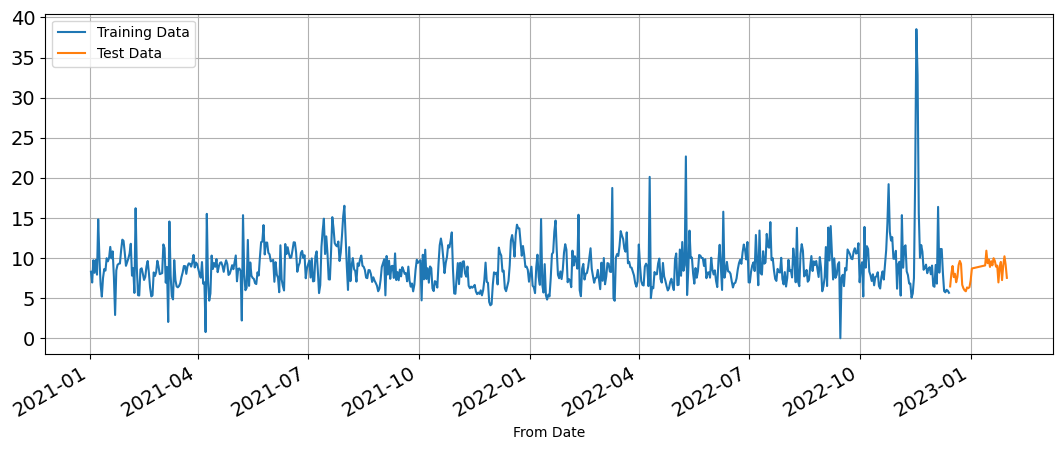

In [ ]:
train_NH3['NH3'].plot(figsize=(13,5), fontsize=14)
test_NH3['NH3'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **5.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df5 = df.copy()
    df5['dayofweek'] = df5.index.dayofweek
    df5['quarter'] = df5.index.quarter
    df5['month'] = df5.index.month
    df5['year'] = df5.index.year
    df5['dayofyear'] = df5.index.dayofyear
    df5['dayofmonth'] = df5.index.day
    df5['weekofyear'] = df5.index.isocalendar().week
    return df5

df5 = create_features(df_NH3)

In [ ]:
train_xgb = create_features(train_NH3.copy())
test_xgb = create_features(test_NH3.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'NH3'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_NH3=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_NH3.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:6.58005	validation_1-rmse:5.41536
[25]	validation_0-rmse:1.38323	validation_1-rmse:2.63275
[50]	validation_0-rmse:0.87120	validation_1-rmse:2.87281
[54]	validation_0-rmse:0.84349	validation_1-rmse:2.90831


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

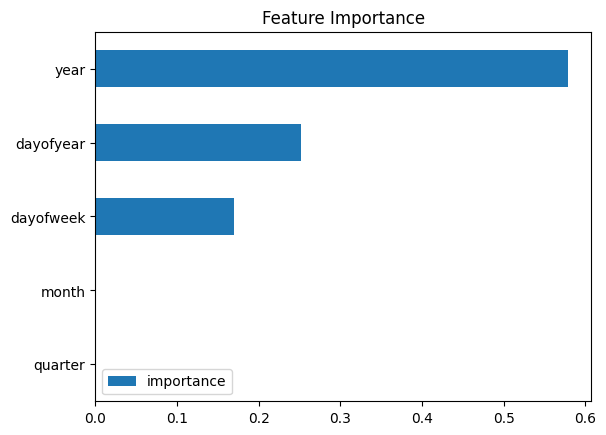

In [ ]:
fi_NH3 = pd.DataFrame(data=reg_NH3.feature_importances_,
             index=reg_NH3.feature_names_in_,
             columns=['importance'])
fi_NH3.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

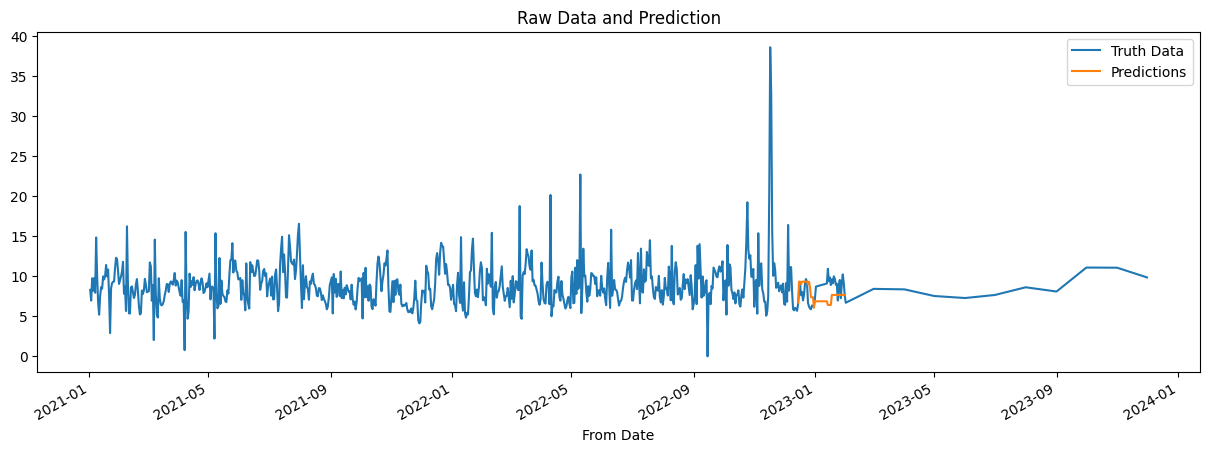

In [ ]:
test_xgb['prediction_NH3'] = reg_NH3.predict(X_test)
df5 = df5.merge(test_xgb[['prediction_NH3']], how='left', left_index=True, right_index=True)
ax = df_NH3[['NH3']].plot(figsize=(15, 5))
df5['prediction_NH3'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **5.4) Evaluation**

In [ ]:
print(df_NH3.max())
print(df_NH3.min())
# , 'Max':[165],'Min':[0]

NH3    38.54
dtype: float64
NH3    0.0
dtype: float64


In [ ]:
rmse_modelNH3_test = metrics.mean_squared_error(test_xgb['NH3'], test_xgb['prediction_NH3'],squared=False)
print("For NH3 forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelNH3_test))

For NH3 forecast on the Test Data,  RMSE is 1.857


In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_modelNH3_test], 'Max':[39],'Min':[0], 'Error %':[ (rmse_modelNH3_test*100)/(38.54) ]},index=['NH3'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5  15.833343  165    0   9.587830
PM10   21.393969  178    0  11.973343
NO2     6.416283   89    0   7.215792
NOx     4.078854   62    0   6.680076
NH3     1.857093   39    0   4.818611

# 6) SO2

## **6.1 Visualization**

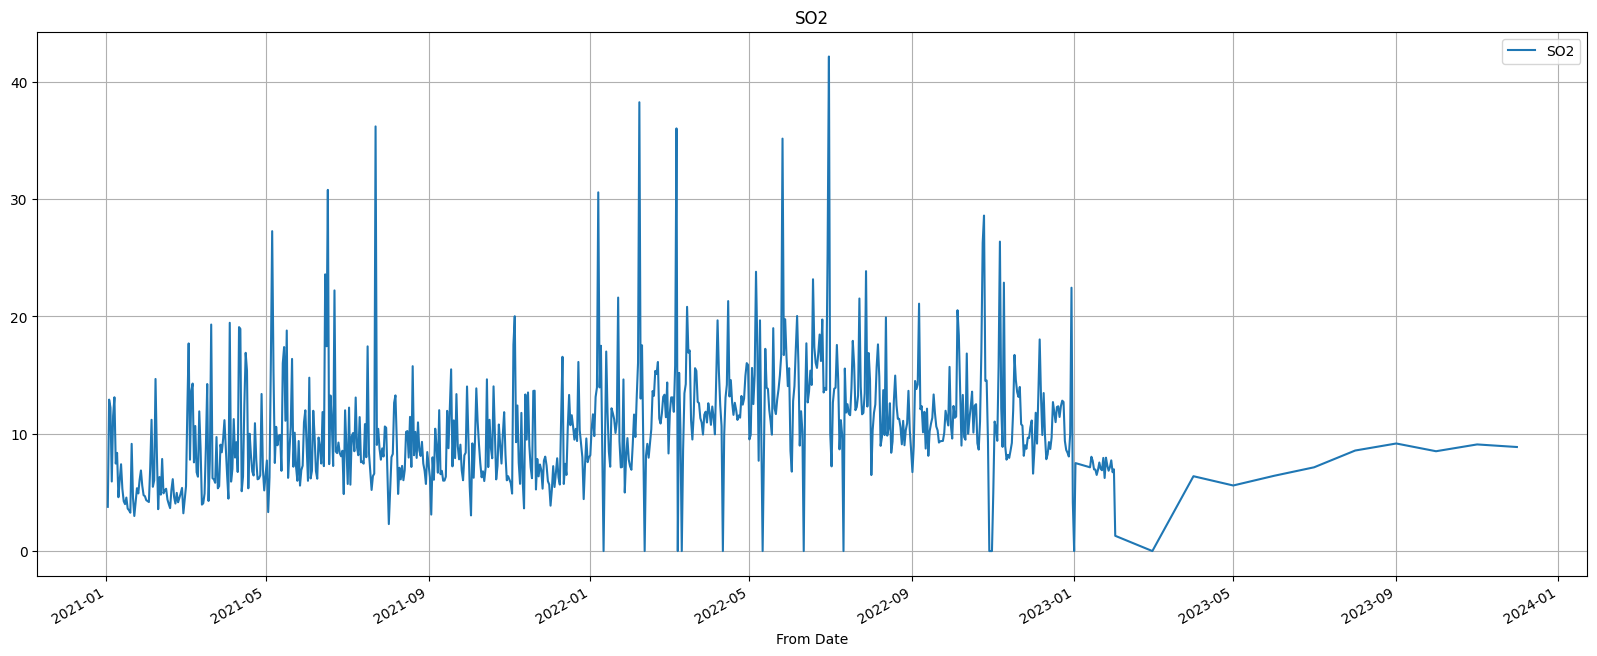

In [ ]:
df_SO2.plot(figsize=(20,8))
plt.title("SO2")
plt.grid();

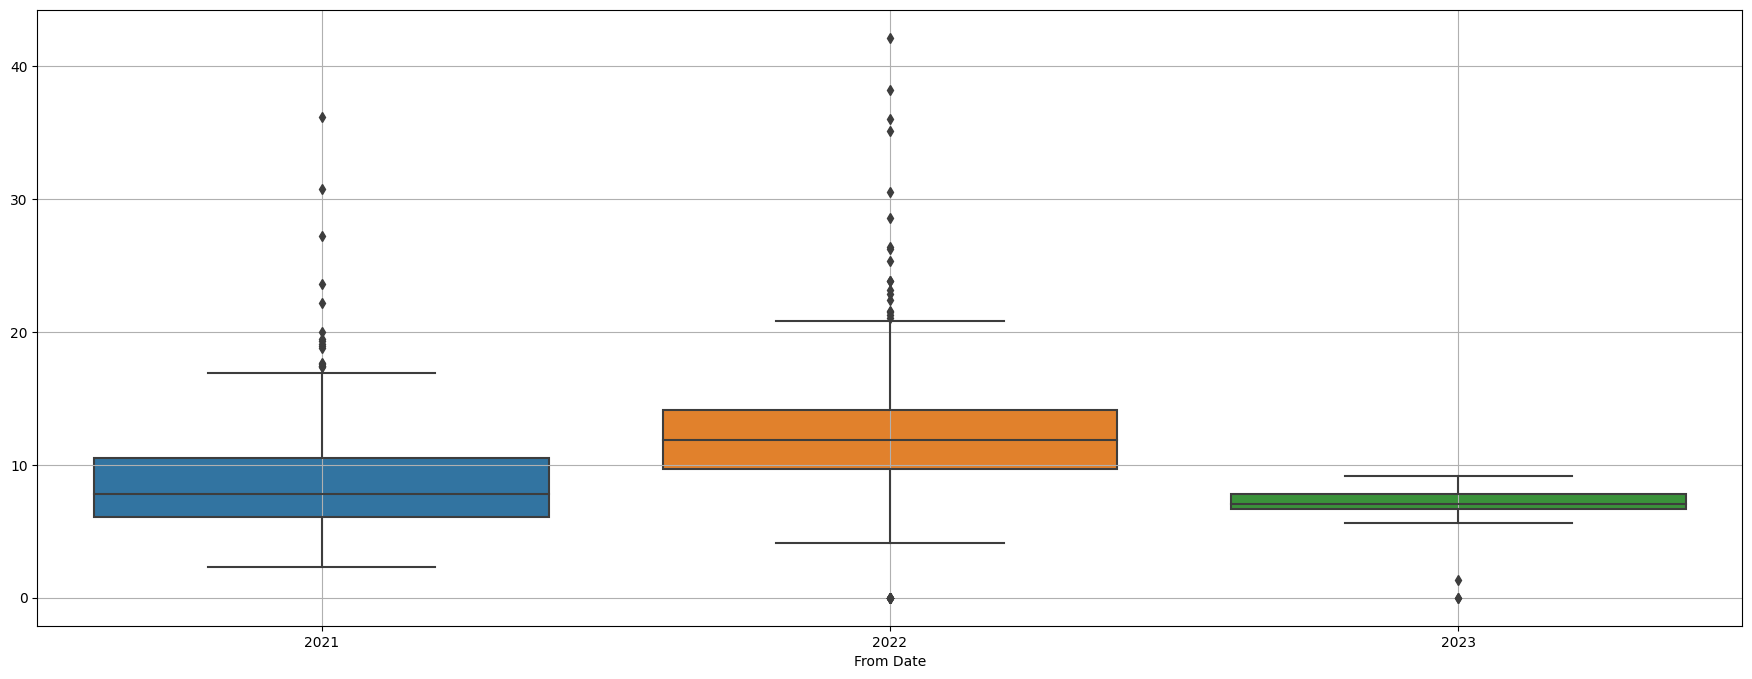

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_SO2.index.year,y = df_SO2.values[:,0],ax=ax)
plt.grid();

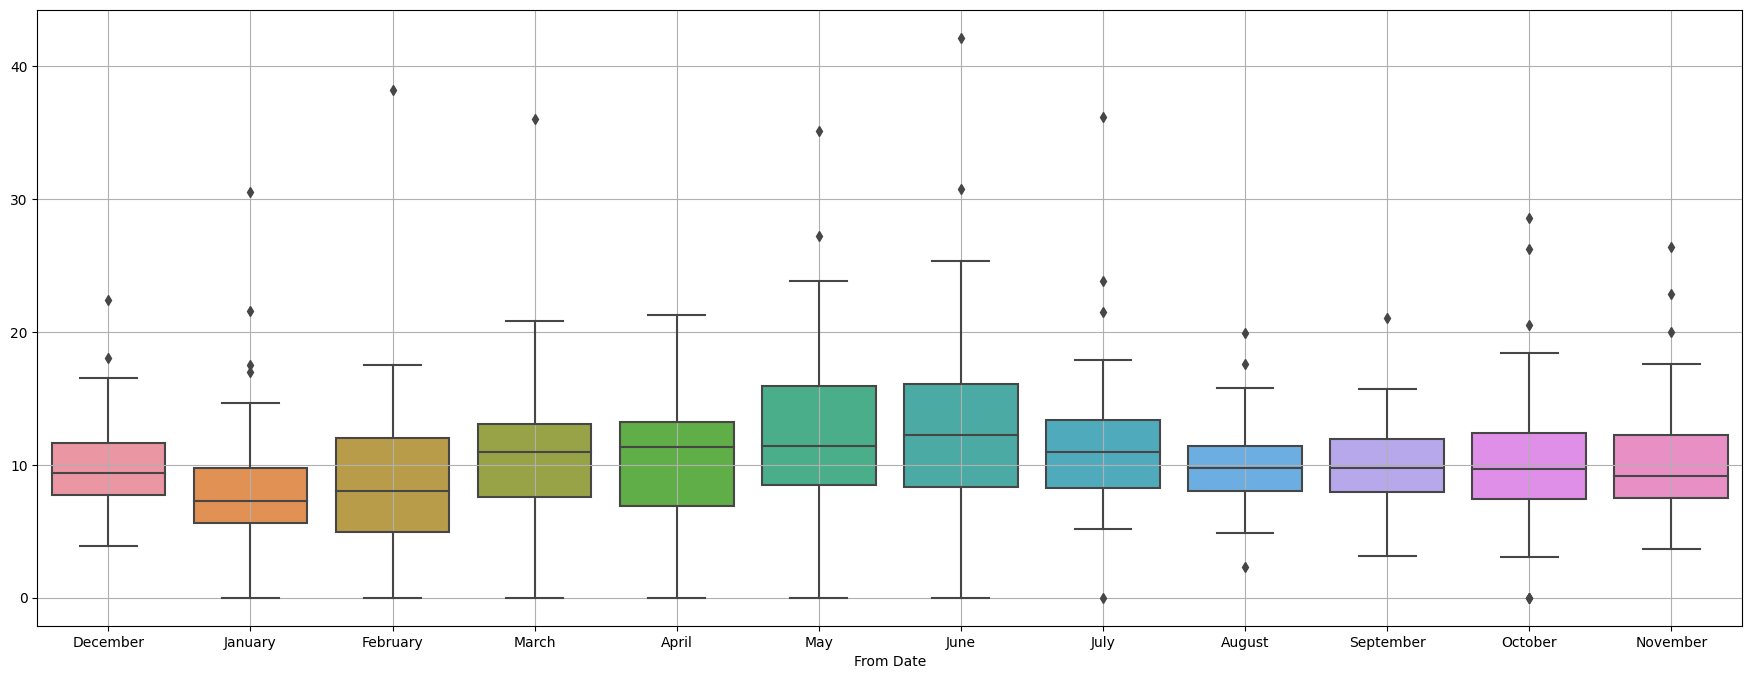

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_SO2.index.month_name(),y = df_SO2.values[:,0],ax=ax)
plt.grid();

## **6.2 Train Test Split**

In [ ]:
train_SO2 = df_SO2[df_SO2.index<'2022-12-15']
test_SO2  = df_SO2[(df_SO2.index>='2022-12-15') & (df_SO2.index < '2023-02-01')]
print(train_SO2.shape)
print(test_SO2.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_SO2.head(),'\n')
print('Last few rows of Training Data','\n',train_SO2.tail(),'\n')
print('First few rows of Test Data','\n',test_SO2.head(),'\n')
print('Last few rows of Test Data','\n',test_SO2.tail(),'\n')

First few rows of Training Data 
              SO2
From Date       
2021-12-01  5.67
2021-01-13  5.29
2021-01-14  4.25
2021-01-15  4.00
2021-01-16  4.56 

Last few rows of Training Data 
               SO2
From Date        
2022-10-12  16.84
2022-11-12   8.20
2022-12-12   8.25
2022-12-13   9.29
2022-12-14   8.70 

First few rows of Test Data 
               SO2
From Date        
2022-12-15   9.68
2022-12-16  12.70
2022-12-17  11.85
2022-12-18  10.99
2022-12-19  12.28 

Last few rows of Test Data 
              SO2
From Date       
2023-01-28  7.16
2023-01-29  7.73
2023-01-30  6.72
2023-01-31  6.97
2023-01-02  7.50 



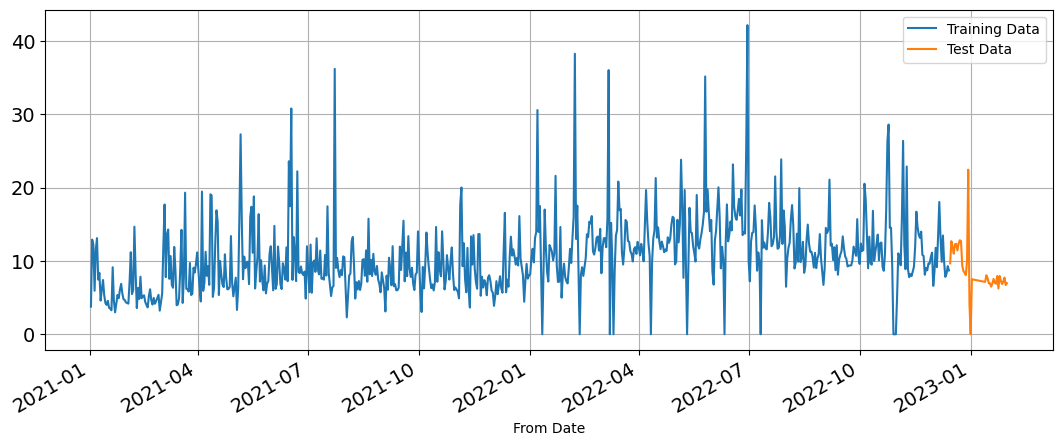

In [ ]:
train_SO2['SO2'].plot(figsize=(13,5), fontsize=14)
test_SO2['SO2'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **6.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df6 = df.copy()
    df6['dayofweek'] = df6.index.dayofweek
    df6['quarter'] = df6.index.quarter
    df6['month'] = df6.index.month
    df6['year'] = df6.index.year
    df6['dayofyear'] = df6.index.dayofyear
    df6['dayofmonth'] = df6.index.day
    df6['weekofyear'] = df6.index.isocalendar().week
    return df6

df6 = create_features(df_SO2)

In [ ]:
train_xgb = create_features(train_SO2.copy())
test_xgb = create_features(test_SO2.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'SO2'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_SO2=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_SO2.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:8.54752	validation_1-rmse:6.28088
[25]	validation_0-rmse:2.35228	validation_1-rmse:4.01277
[50]	validation_0-rmse:1.53293	validation_1-rmse:4.21005
[61]	validation_0-rmse:1.33293	validation_1-rmse:4.33209


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

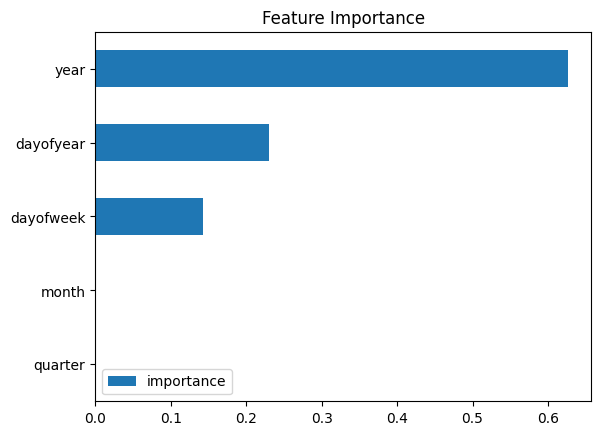

In [ ]:
fi_SO2 = pd.DataFrame(data=reg_SO2.feature_importances_,
             index=reg_SO2.feature_names_in_,
             columns=['importance'])
fi_SO2.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

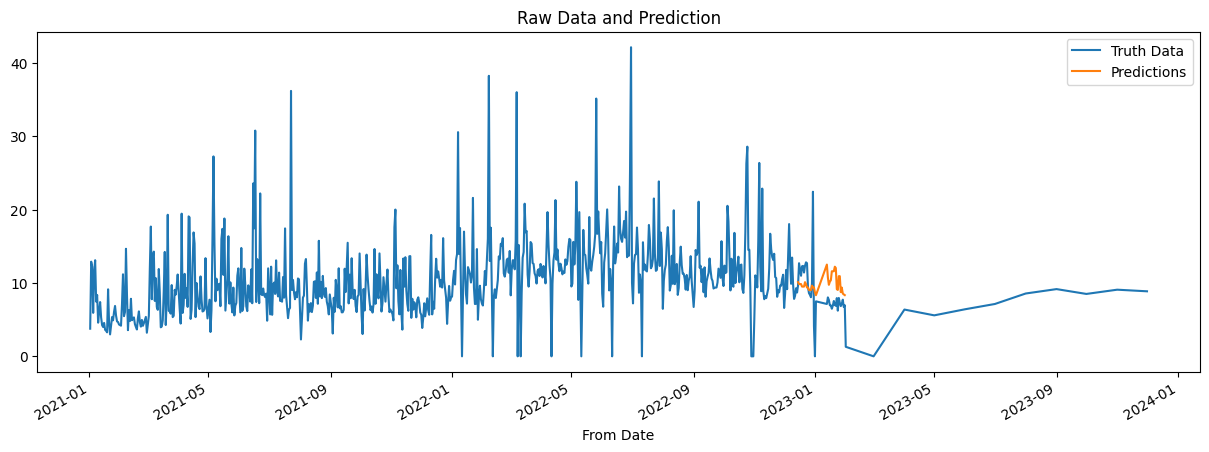

In [ ]:
test_xgb['prediction_SO2'] = reg_SO2.predict(X_test)
df6 = df6.merge(test_xgb[['prediction_SO2']], how='left', left_index=True, right_index=True)
ax = df_SO2[['SO2']].plot(figsize=(15, 5))
df6['prediction_SO2'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **6.4) Evaluation**

In [ ]:
print(df_SO2.max())
print(df_SO2.min())
# , 'Max':[165],'Min':[0]

SO2    42.16
dtype: float64
SO2    0.0
dtype: float64


In [ ]:
rmse_modelSO2_test = metrics.mean_squared_error(test_xgb['SO2'], test_xgb['prediction_SO2'],squared=False)
print("For SO2 forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelSO2_test))

For SO2 forecast on the Test Data,  RMSE is 3.841


In [ ]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_modelSO2_test], 'Max':[43],'Min':[0], 'Error %':[ (rmse_modelSO2_test*100)/(42.16) ]},index=['SO2'])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5  15.833343  165    0   9.587830
PM10   21.393969  178    0  11.973343
NO2     6.416283   89    0   7.215792
NOx     4.078854   62    0   6.680076
NH3     1.857093   39    0   4.818611
SO2     3.840697   43    0   9.109814

# 7) CO

## **7.1 Visualization**

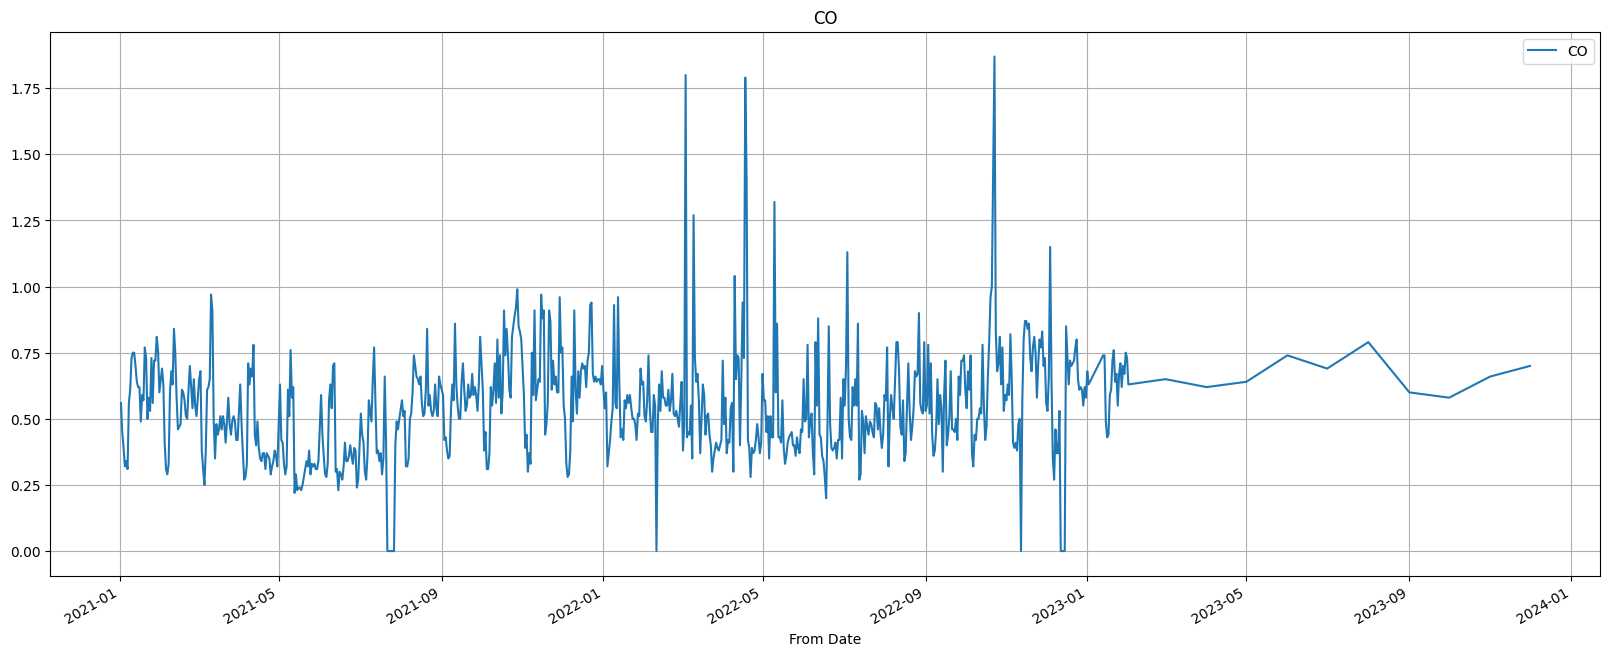

In [ ]:
df_CO.plot(figsize=(20,8))
plt.title("CO")
plt.grid();

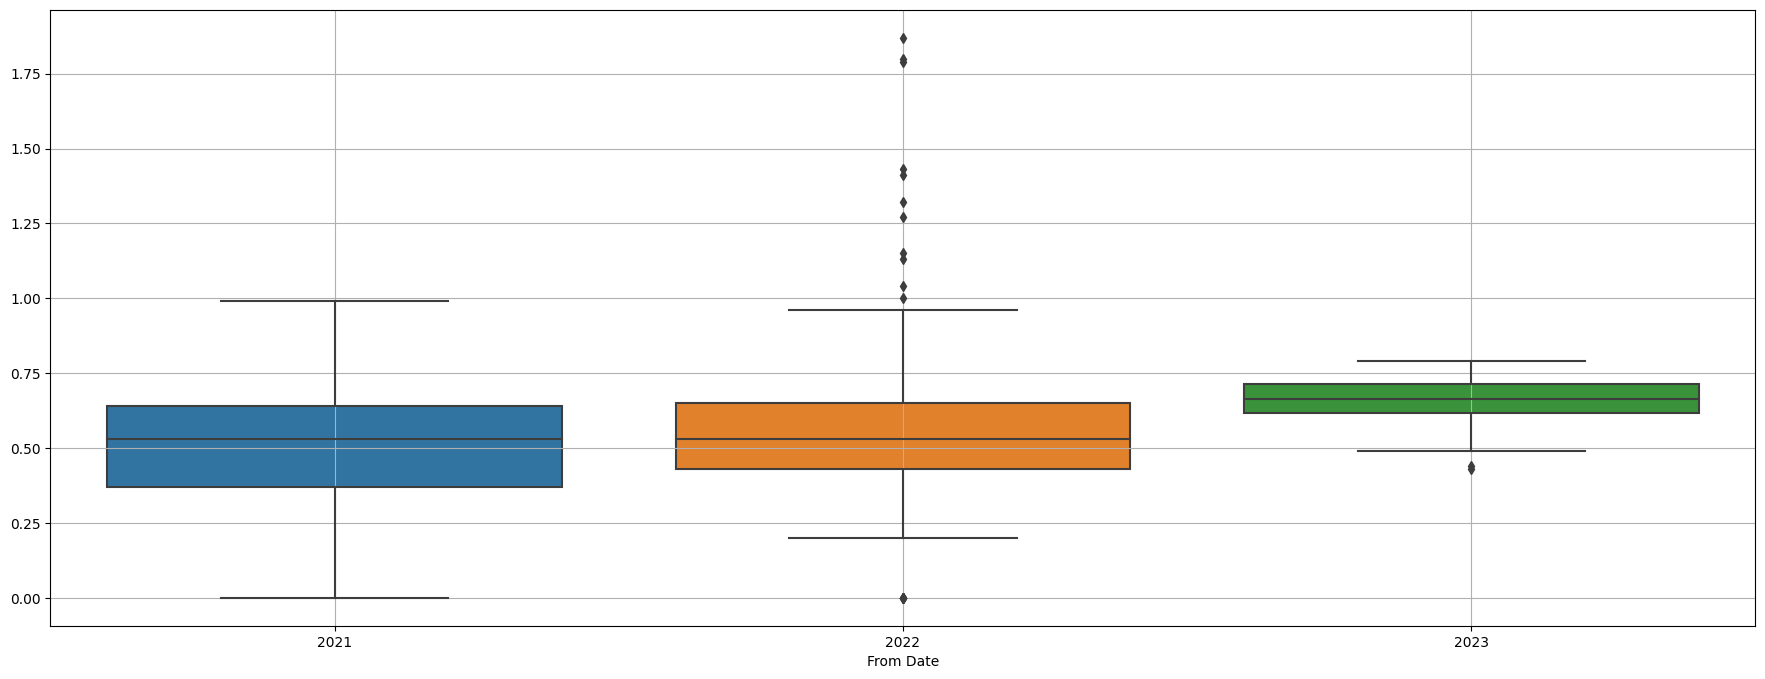

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_CO.index.year,y = df_CO.values[:,0],ax=ax)
plt.grid();

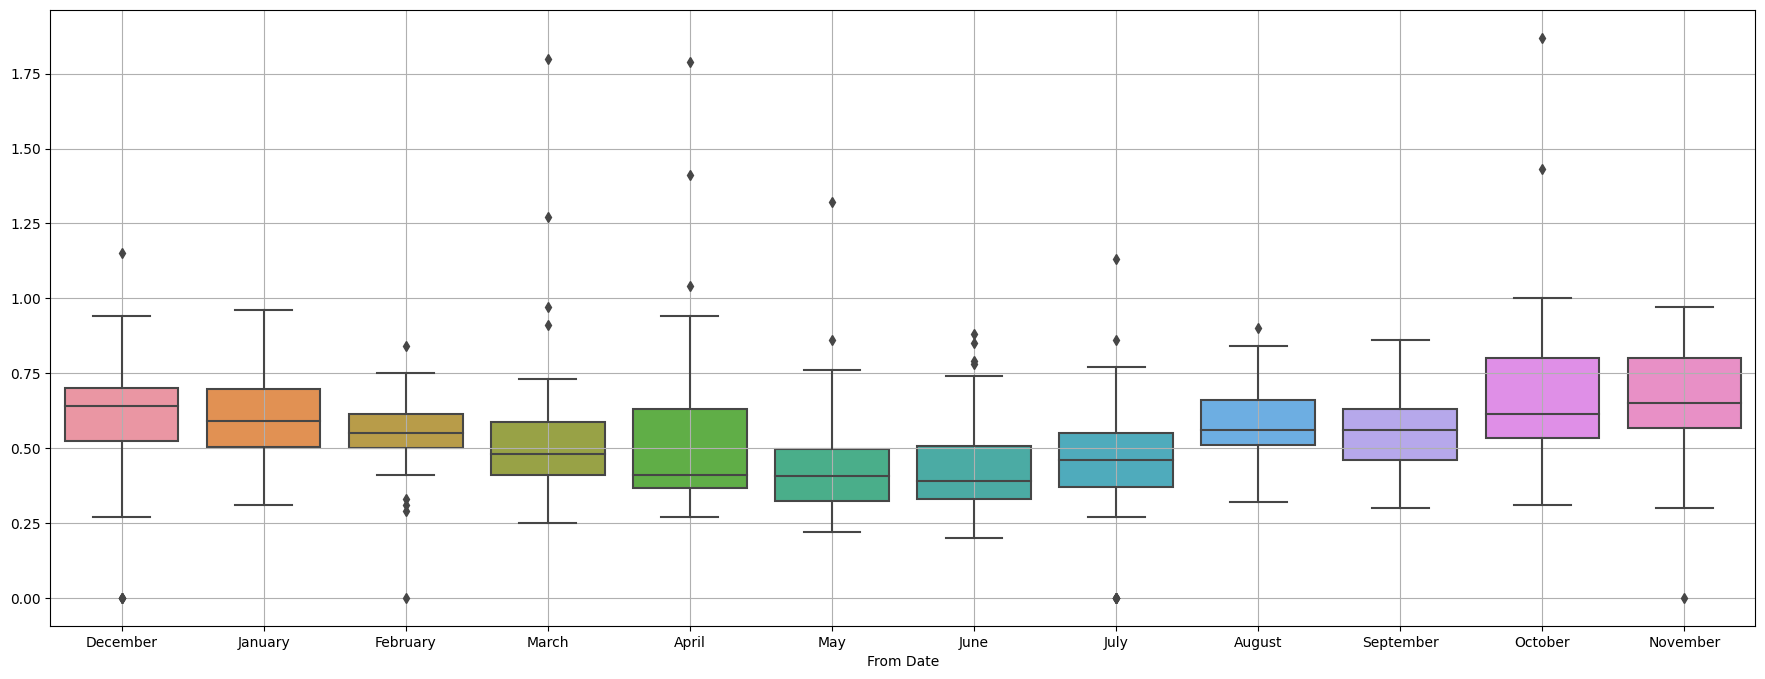

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_CO.index.month_name(),y = df_CO.values[:,0],ax=ax)
plt.grid();

## **7.2 Train Test Split**

In [ ]:
train_CO = df_CO[df_CO.index<'2022-12-15']
test_CO  = df_CO[(df_CO.index>='2022-12-15') & (df_CO.index < '2023-02-01')]
print(train_CO.shape)
print(test_CO.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_CO.head(),'\n')
print('Last few rows of Training Data','\n',train_CO.tail(),'\n')
print('First few rows of Test Data','\n',test_CO.head(),'\n')
print('Last few rows of Test Data','\n',test_CO.tail(),'\n')

First few rows of Training Data 
               CO
From Date       
2021-12-01  0.77
2021-01-13  0.70
2021-01-14  0.64
2021-01-15  0.62
2021-01-16  0.62 

Last few rows of Training Data 
               CO
From Date       
2022-10-12  0.54
2022-11-12  0.00
2022-12-12  0.00
2022-12-13  0.00
2022-12-14  0.00 

First few rows of Test Data 
               CO
From Date       
2022-12-15  0.00
2022-12-16  0.85
2022-12-17  0.74
2022-12-18  0.63
2022-12-19  0.72 

Last few rows of Test Data 
               CO
From Date       
2023-01-28  0.70
2023-01-29  0.67
2023-01-30  0.75
2023-01-31  0.73
2023-01-02  0.63 



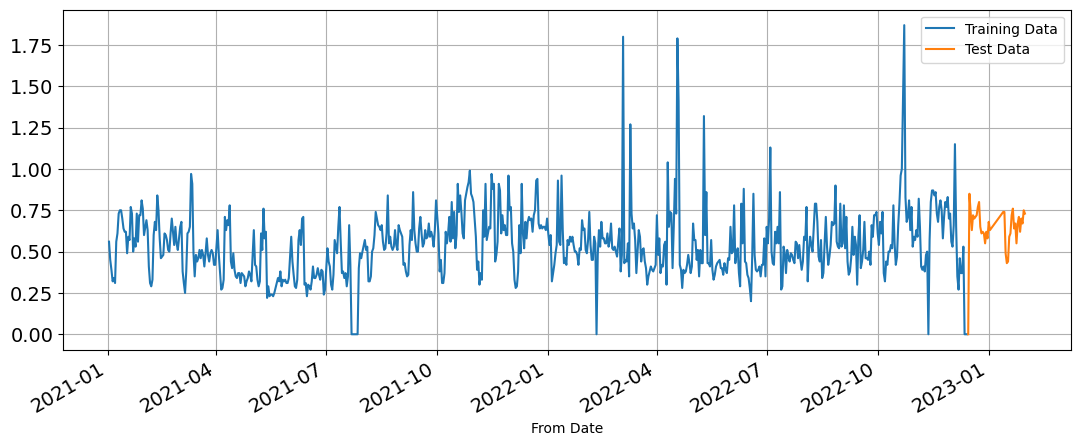

In [ ]:
train_CO['CO'].plot(figsize=(13,5), fontsize=14)
test_CO['CO'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **7.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df7 = df.copy()
    df7['dayofweek'] = df7.index.dayofweek
    df7['quarter'] = df7.index.quarter
    df7['month'] = df7.index.month
    df7['year'] = df7.index.year
    df7['dayofyear'] = df7.index.dayofyear
    df7['dayofmonth'] = df7.index.day
    df7['weekofyear'] = df7.index.isocalendar().week
    return df7

df7 = create_features(df_CO)

In [ ]:
train_xgb = create_features(train_CO.copy())
test_xgb = create_features(test_CO.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'CO'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_CO=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_CO.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:0.18209	validation_1-rmse:0.17686
[25]	validation_0-rmse:0.07338	validation_1-rmse:0.27041
[50]	validation_0-rmse:0.04971	validation_1-rmse:0.28342


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

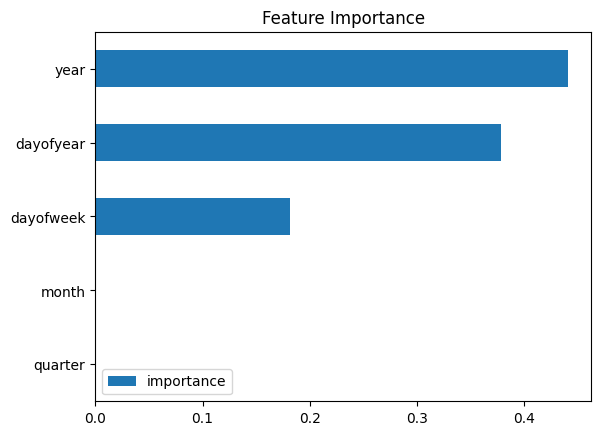

In [ ]:
fi_CO = pd.DataFrame(data=reg_CO.feature_importances_,
             index=reg_CO.feature_names_in_,
             columns=['importance'])
fi_CO.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

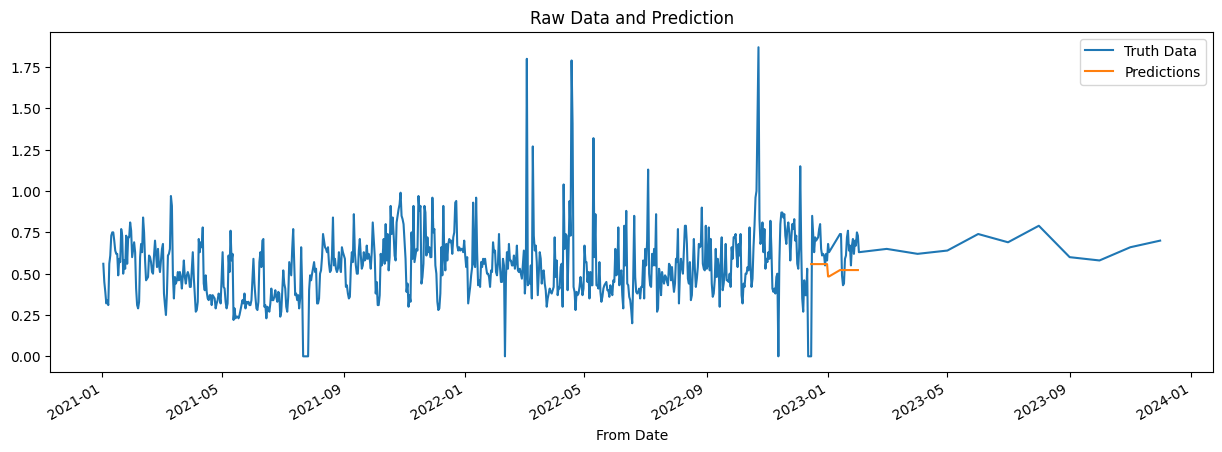

In [ ]:
test_xgb['prediction_CO'] = reg_CO.predict(X_test)
df7 = df7.merge(test_xgb[['prediction_CO']], how='left', left_index=True, right_index=True)
ax = df_CO[['CO']].plot(figsize=(15, 5))
df7['prediction_CO'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **7.4) Evaluation**

In [ ]:
print(df_CO.max())
print(df_CO.min())
# , 'Max':[165],'Min':[0]

CO    1.87
dtype: float64
CO    0.0
dtype: float64


In [ ]:
rmse_modelCO_test = metrics.mean_squared_error(test_xgb['CO'], test_xgb['prediction_CO'],squared=False)
print("For CO forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelCO_test))

For CO forecast on the Test Data,  RMSE is 0.177


In [ ]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_modelCO_test], 'Max':[2],'Min':[0], 'Error %':[ (rmse_modelCO_test*100)/(1.87-0) ]},index=['CO'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5  15.833343  165    0   9.587830
PM10   21.393969  178    0  11.973343
NO2     6.416283   89    0   7.215792
NOx     4.078854   62    0   6.680076
NH3     1.857093   39    0   4.818611
SO2     3.840697   43    0   9.109814
CO      0.176857    2    0   9.457570

# 8) O3

## **8.1 Visualization**

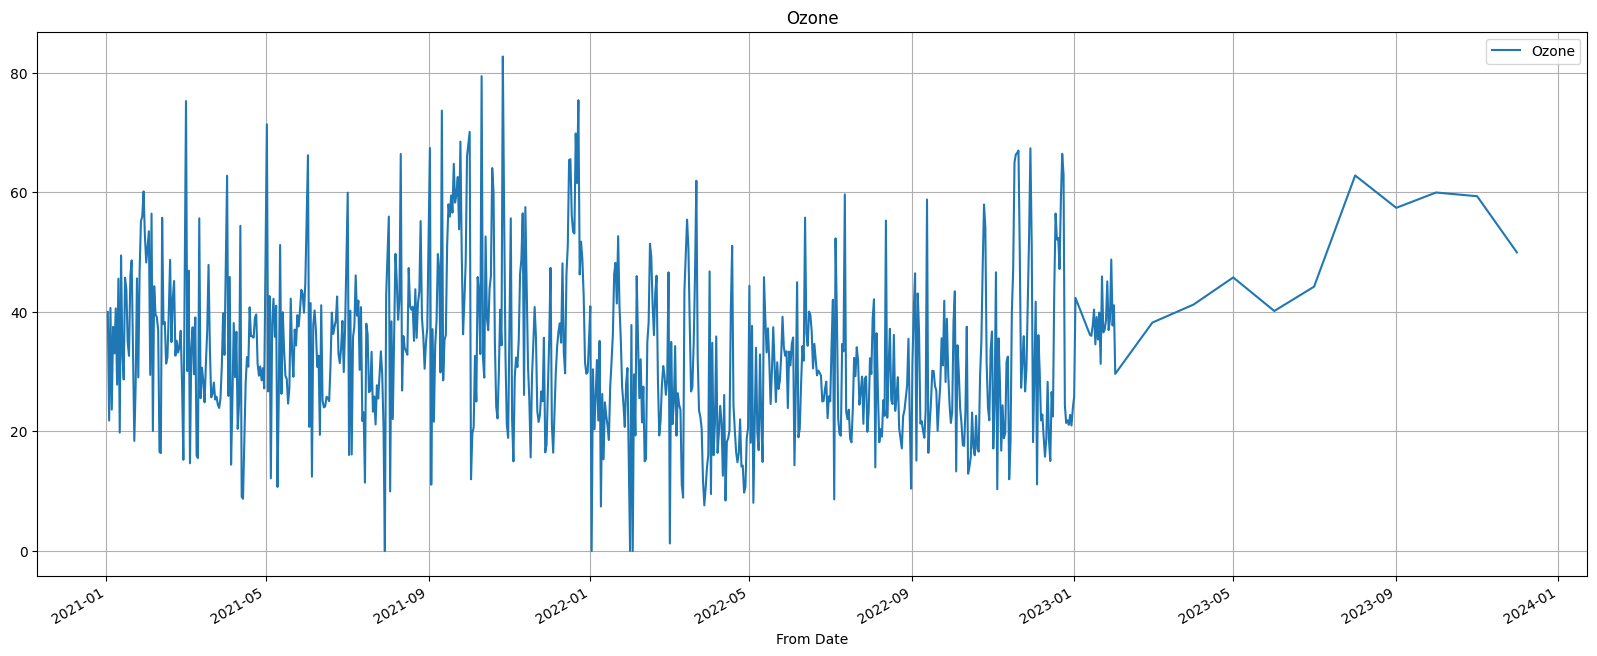

In [ ]:
df_Ozone.plot(figsize=(20,8))
plt.title("Ozone")
plt.grid();

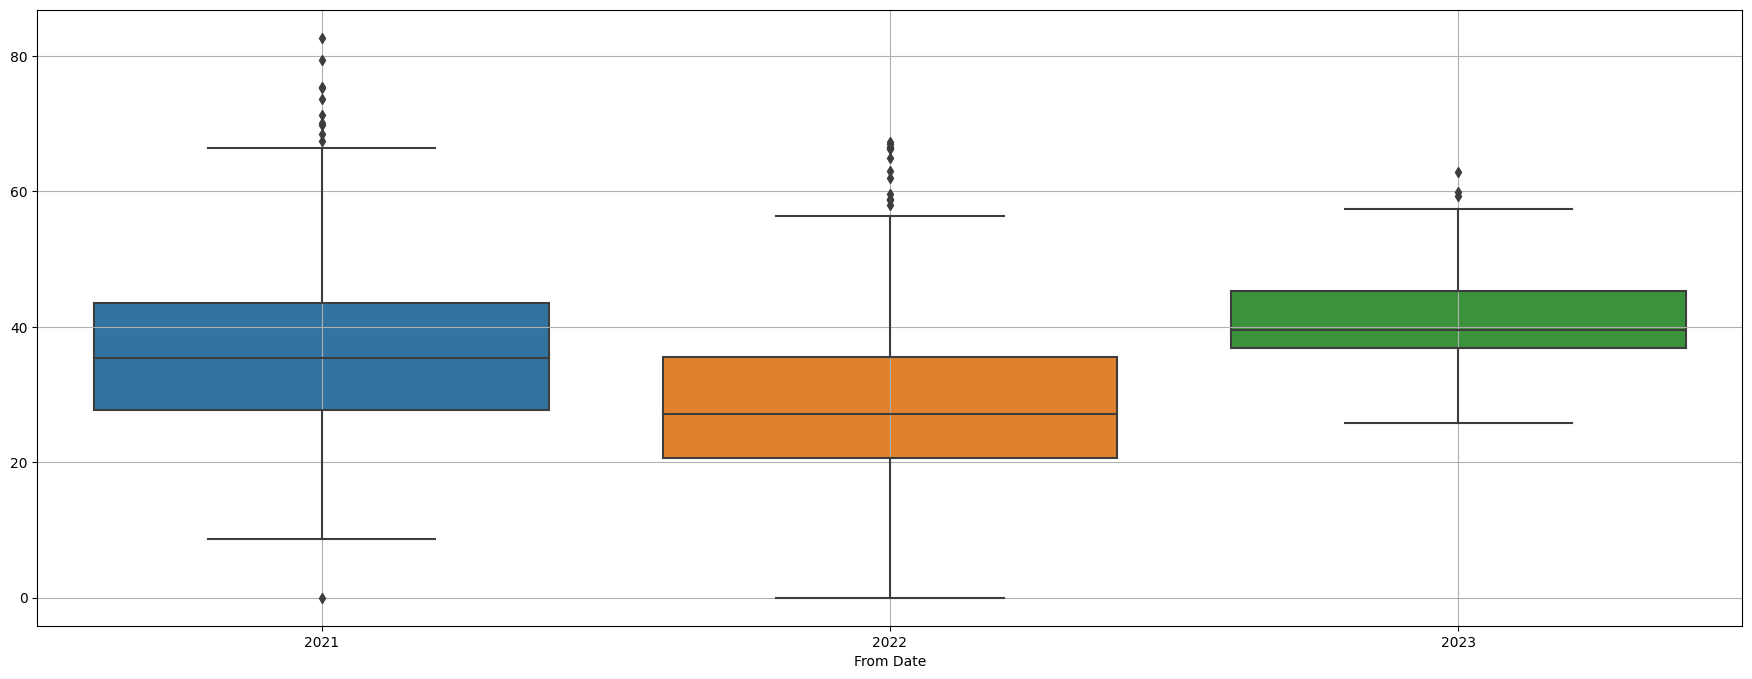

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_Ozone.index.year,y = df_Ozone.values[:,0],ax=ax)
plt.grid();

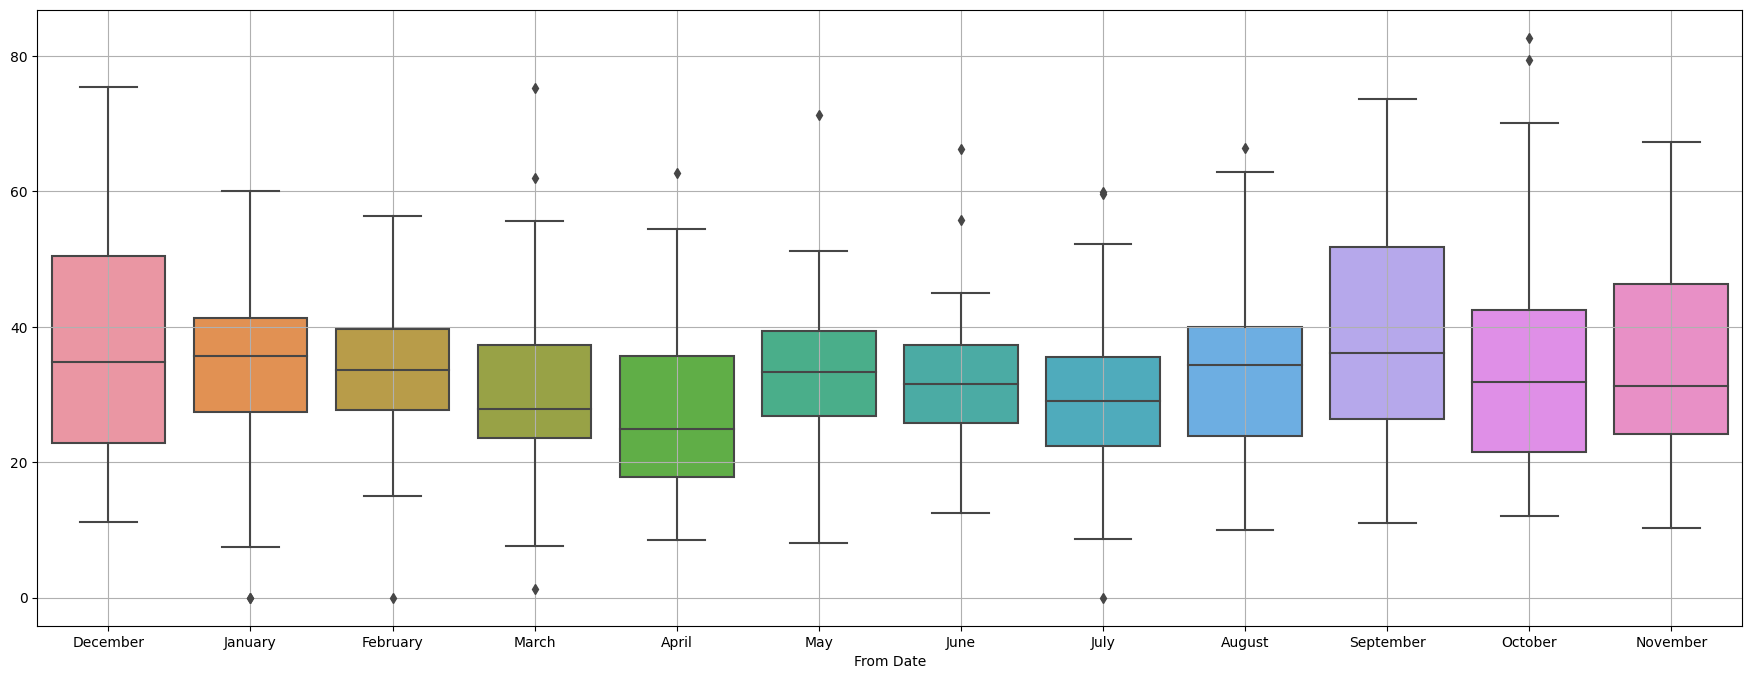

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_Ozone.index.month_name(),y = df_Ozone.values[:,0],ax=ax)
plt.grid();

## **8.2 Train Test Split**

In [ ]:
train_Ozone = df_Ozone[df_Ozone.index<'2022-12-15']
test_Ozone  = df_Ozone[(df_Ozone.index>='2022-12-15') & (df_Ozone.index < '2023-02-01')]
print(train_Ozone.shape)
print(test_Ozone.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_Ozone.head(),'\n')
print('Last few rows of Training Data','\n',train_Ozone.tail(),'\n')
print('First few rows of Test Data','\n',test_Ozone.head(),'\n')
print('Last few rows of Test Data','\n',test_Ozone.tail(),'\n')

First few rows of Training Data 
             Ozone
From Date        
2021-12-01  35.52
2021-01-13  33.00
2021-01-14  28.69
2021-01-15  45.71
2021-01-16  43.76 

Last few rows of Training Data 
             Ozone
From Date        
2022-10-12  37.51
2022-11-12  32.52
2022-12-12  28.29
2022-12-13  18.56
2022-12-14  15.05 

First few rows of Test Data 
             Ozone
From Date        
2022-12-15  26.59
2022-12-16  22.51
2022-12-17  43.73
2022-12-18  56.43
2022-12-19  52.09 

Last few rows of Test Data 
             Ozone
From Date        
2023-01-28  38.71
2023-01-29  48.74
2023-01-30  37.72
2023-01-31  41.09
2023-01-02  42.34 



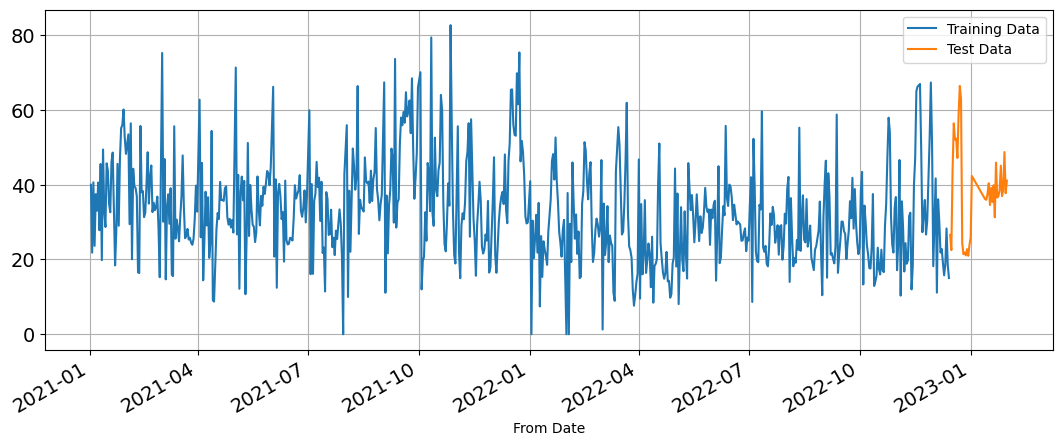

In [ ]:
train_Ozone['Ozone'].plot(figsize=(13,5), fontsize=14)
test_Ozone['Ozone'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **8.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df8 = df.copy()
    df8['dayofweek'] = df8.index.dayofweek
    df8['quarter'] = df8.index.quarter
    df8['month'] = df8.index.month
    df8['year'] = df8.index.year
    df8['dayofyear'] = df8.index.dayofyear
    df8['dayofmonth'] = df8.index.day
    df8['weekofyear'] = df8.index.isocalendar().week
    return df8

df8 = create_features(df_Ozone)

In [ ]:
train_xgb = create_features(train_Ozone.copy())
test_xgb = create_features(test_Ozone.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Ozone'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_Ozone=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_Ozone.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:25.94123	validation_1-rmse:32.50817
[25]	validation_0-rmse:6.70004	validation_1-rmse:16.52130
[50]	validation_0-rmse:4.40708	validation_1-rmse:16.77344
[73]	validation_0-rmse:3.44609	validation_1-rmse:17.16147


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

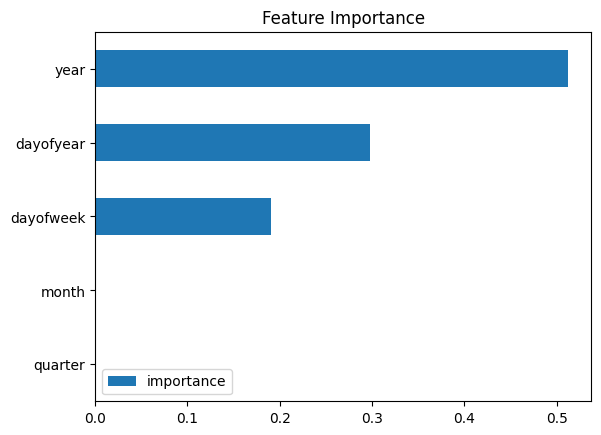

In [ ]:
fi_Ozone = pd.DataFrame(data=reg_Ozone.feature_importances_,
             index=reg_Ozone.feature_names_in_,
             columns=['importance'])
fi_Ozone.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

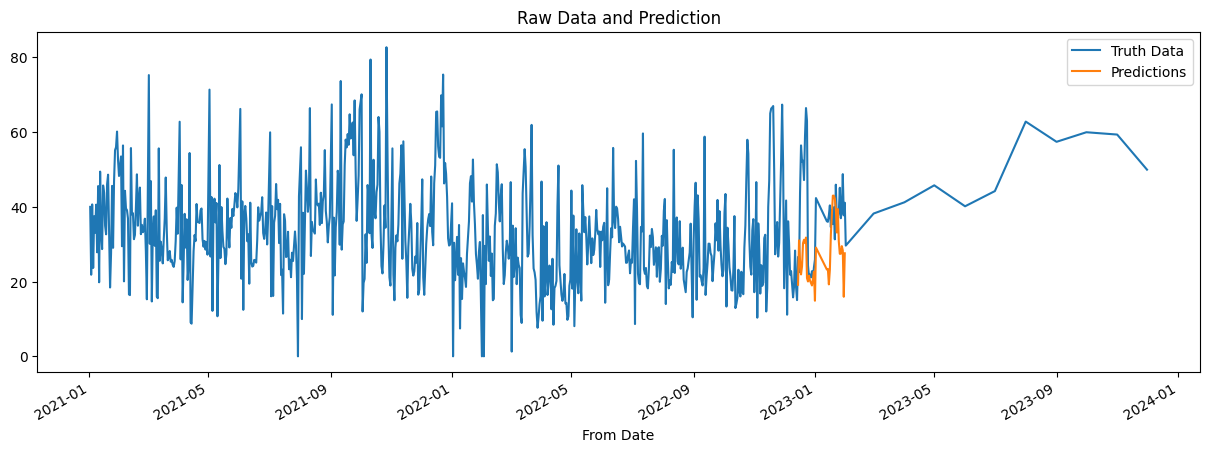

In [ ]:
test_xgb['prediction_Ozone'] = reg_Ozone.predict(X_test)
df8 = df8.merge(test_xgb[['prediction_Ozone']], how='left', left_index=True, right_index=True)
ax = df_Ozone[['Ozone']].plot(figsize=(15, 5))
df8['prediction_Ozone'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **8.4) Evaluation**

In [ ]:
print(df_Ozone.max())
print(df_Ozone.min())
# , 'Max':[165],'Min':[0]

Ozone    82.69
dtype: float64
Ozone    0.0
dtype: float64


In [ ]:
rmse_modelOzone_test = metrics.mean_squared_error(test_xgb['Ozone'], test_xgb['prediction_Ozone'],squared=False)
print("For 03 forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelOzone_test))

For 03 forecast on the Test Data,  RMSE is 16.326


In [ ]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_modelOzone_test], 'Max':[83],'Min':[0], 'Error %':[ (rmse_modelOzone_test*100)/(82.69-0) ]},index=['Ozone'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5  15.833343  165    0   9.587830
PM10   21.393969  178    0  11.973343
NO2     6.416283   89    0   7.215792
NOx     4.078854   62    0   6.680076
NH3     1.857093   39    0   4.818611
SO2     3.840697   43    0   9.109814
CO      0.176857    2    0   9.457570
Ozone  16.326346   83    0  19.744039

# 9) AQI

## **9.1 Visualization**

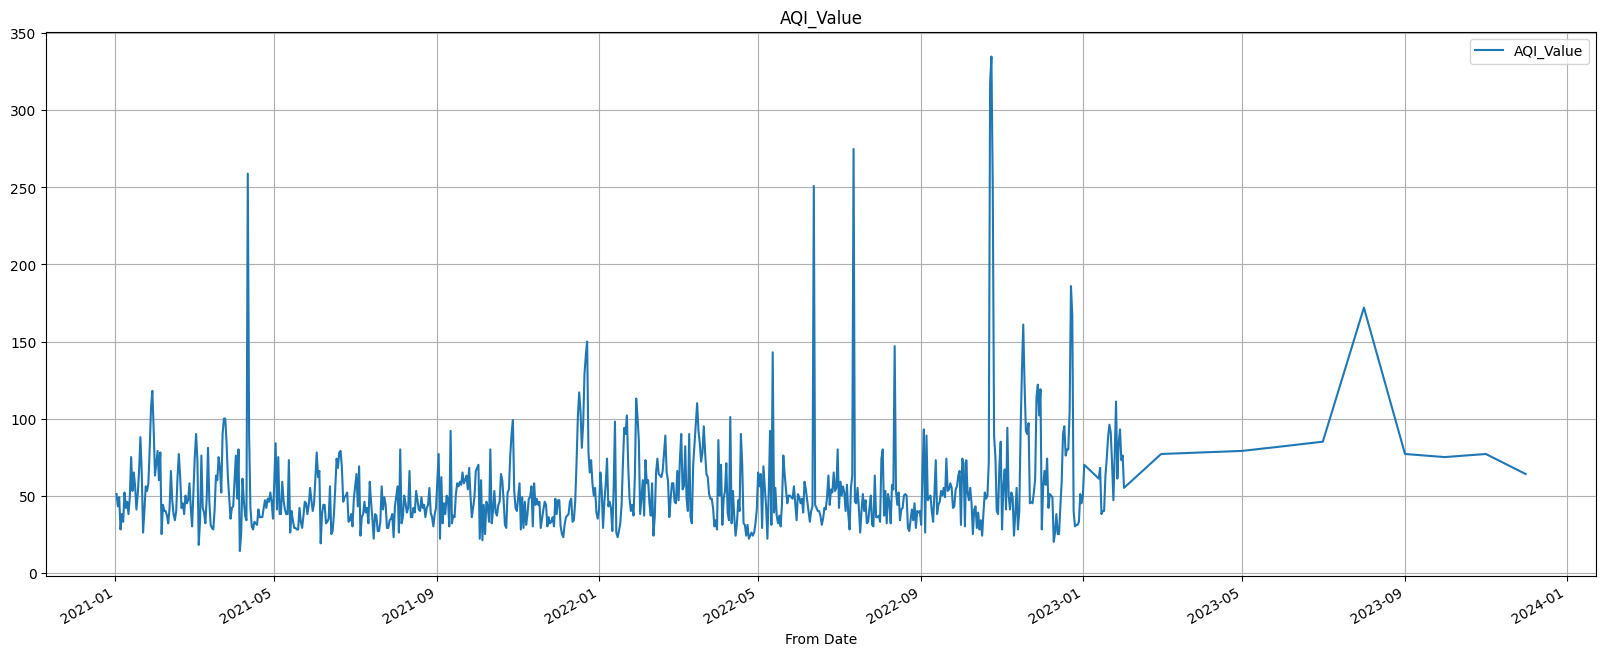

In [ ]:
df_AQI.plot(figsize=(20,8))
plt.title("AQI_Value")
plt.grid();

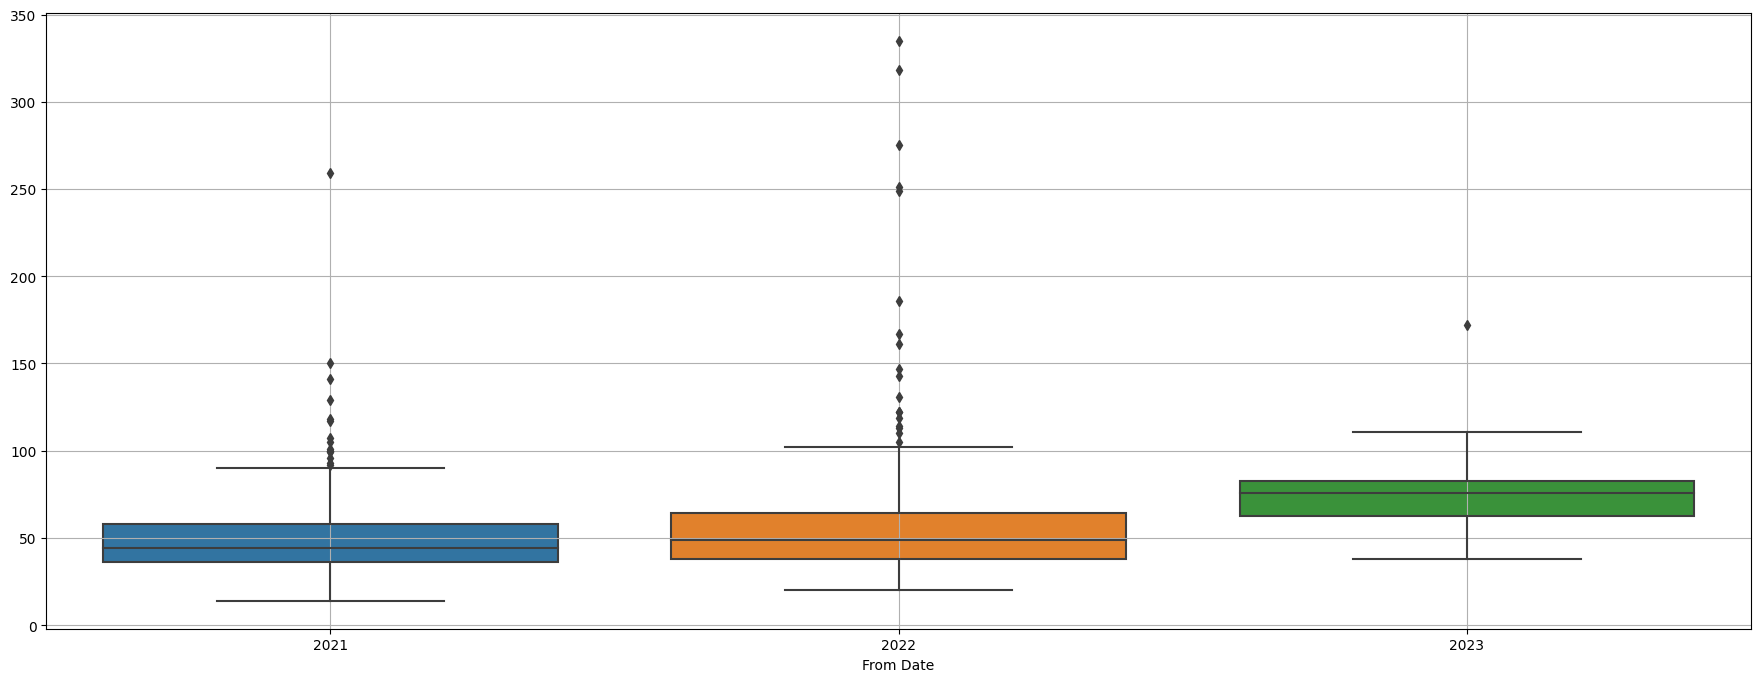

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_AQI.index.year,y = df_AQI.values[:,0],ax=ax)
plt.grid();

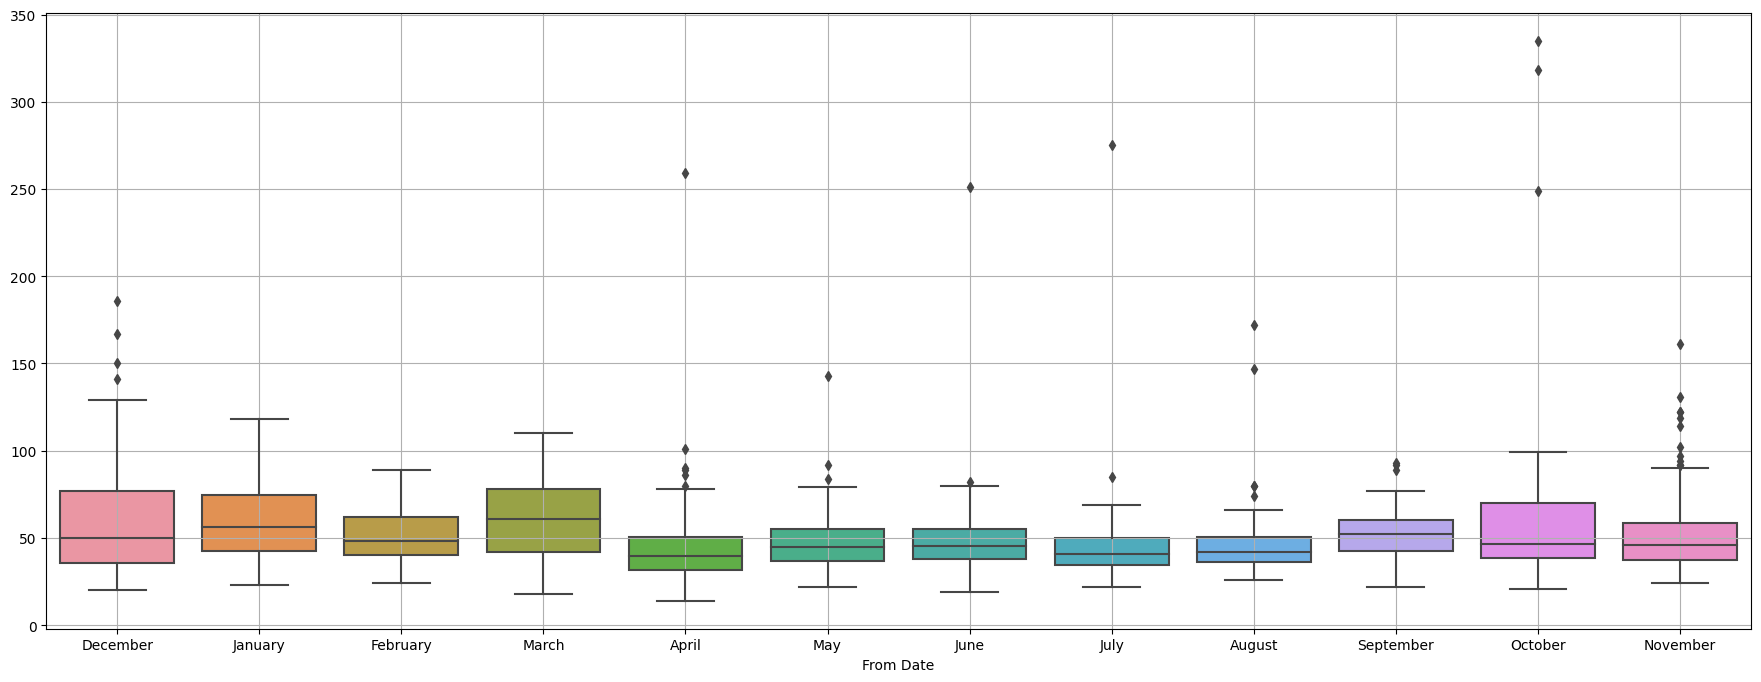

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_AQI.index.month_name(),y = df_AQI.values[:,0],ax=ax)
plt.grid();

## **9.2 Train Test Split**

In [ ]:
train_AQI = df_AQI[df_AQI.index<'2022-12-15']
test_AQI  = df_AQI[(df_AQI.index>='2022-12-15') & (df_AQI.index < '2023-02-01')]
print(train_AQI.shape)
print(test_AQI.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train_AQI.head(),'\n')
print('Last few rows of Training Data','\n',train_AQI.tail(),'\n')
print('First few rows of Test Data','\n',test_AQI.head(),'\n')
print('Last few rows of Test Data','\n',test_AQI.tail(),'\n')

First few rows of Training Data 
             AQI_Value
From Date            
2021-12-01       47.0
2021-01-13       75.0
2021-01-14       53.0
2021-01-15       65.0
2021-01-16       56.0 

Last few rows of Training Data 
             AQI_Value
From Date            
2022-10-12       43.0
2022-11-12       55.0
2022-12-12       38.0
2022-12-13       25.0
2022-12-14       25.0 

First few rows of Test Data 
             AQI_Value
From Date            
2022-12-15       43.0
2022-12-16       59.0
2022-12-17       90.0
2022-12-18       95.0
2022-12-19       76.0 

Last few rows of Test Data 
             AQI_Value
From Date            
2023-01-28       84.0
2023-01-29       93.0
2023-01-30       73.0
2023-01-31       76.0
2023-01-02       70.0 



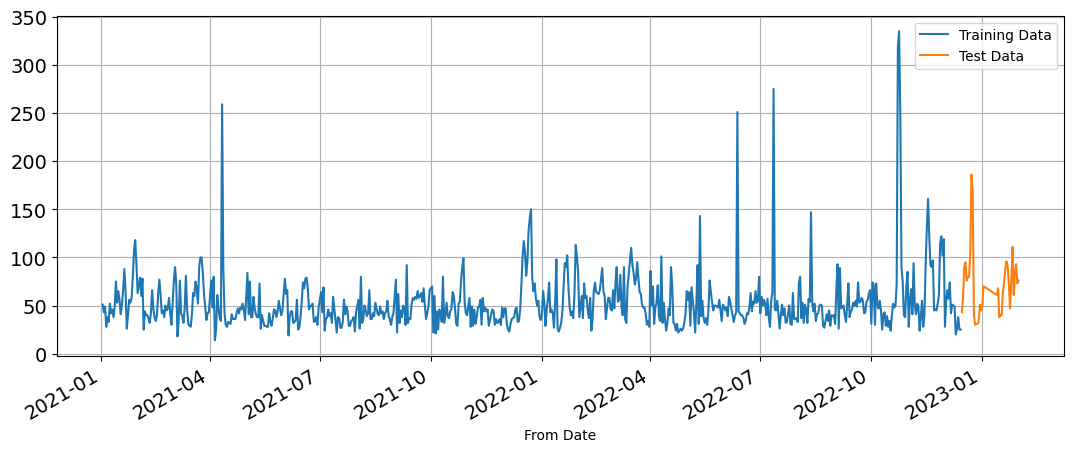

In [ ]:
train_AQI['AQI_Value'].plot(figsize=(13,5), fontsize=14)
test_AQI['AQI_Value'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## **9.3) XGBoost Model**

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df9 = df.copy()
    df9['dayofweek'] = df9.index.dayofweek
    df9['quarter'] = df9.index.quarter
    df9['month'] = df9.index.month
    df9['year'] = df9.index.year
    df9['dayofyear'] = df9.index.dayofyear
    df9['dayofmonth'] = df9.index.day
    df9['weekofyear'] = df9.index.isocalendar().week
    return df9

df9 = create_features(df_AQI)

In [ ]:
train_xgb = create_features(train_AQI.copy())
test_xgb = create_features(test_AQI.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AQI_Value'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
reg_AQI=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg_AQI.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:45.96190	validation_1-rmse:58.86902
[25]	validation_0-rmse:11.17115	validation_1-rmse:29.15067
[50]	validation_0-rmse:7.06764	validation_1-rmse:29.61487
[57]	validation_0-rmse:6.40822	validation_1-rmse:29.64694


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

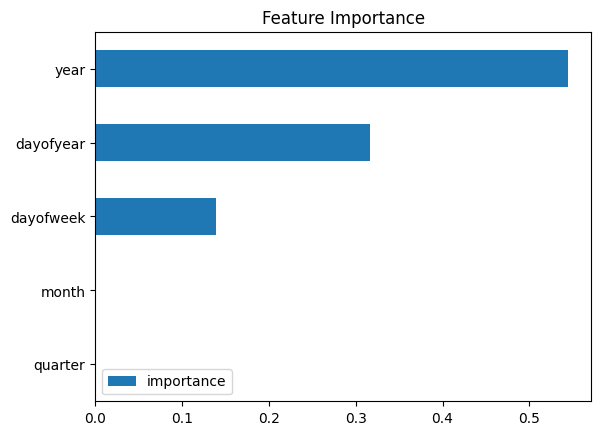

In [ ]:
fi_AQI = pd.DataFrame(data=reg_AQI.feature_importances_,
             index=reg_AQI.feature_names_in_,
             columns=['importance'])
fi_AQI.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

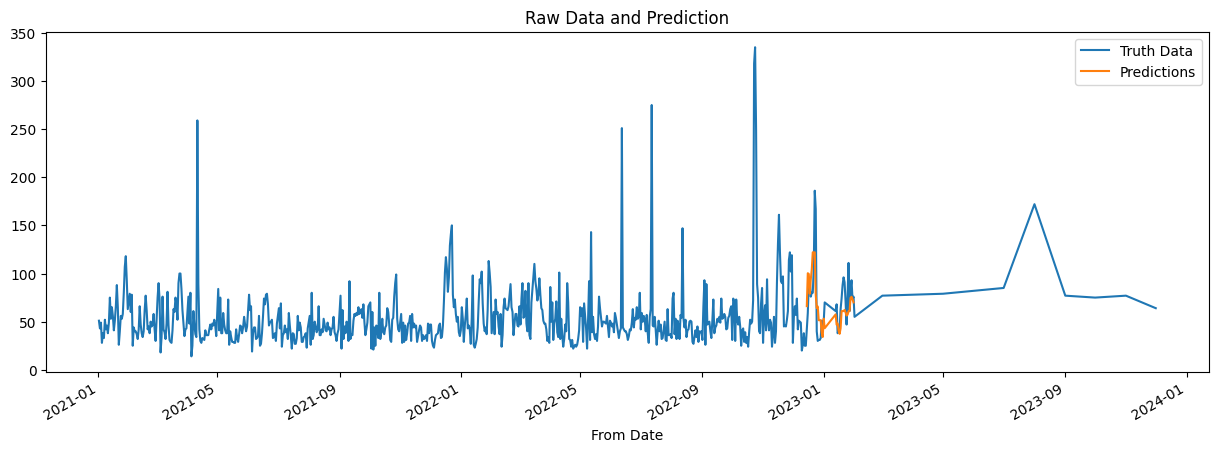

In [ ]:
test_xgb['prediction_AQI'] = reg_AQI.predict(X_test)
df9 = df9.merge(test_xgb[['prediction_AQI']], how='left', left_index=True, right_index=True)
ax = df_AQI[['AQI_Value']].plot(figsize=(15, 5))
df9['prediction_AQI'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## **9.4) Evaluation**

In [ ]:
print(df_AQI.max())
print(df_AQI.min())
# , 'Max':[165],'Min':[0]

AQI_Value    335.0
dtype: float64
AQI_Value    14.0
dtype: float64


In [ ]:
rmse_modelAQI_test = metrics.mean_squared_error(test_xgb['AQI_Value'], test_xgb['prediction_AQI'],squared=False)
print("For AQI forecast on the Test Data,  RMSE is %3.3f" %(rmse_modelAQI_test))

For AQI forecast on the Test Data,  RMSE is 27.652


In [ ]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_modelAQI_test], 'Max':[335],'Min':[14], 'Error %':[ (rmse_modelAQI_test*100)/(335-14) ]},index=['AQI_Value'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE  Max  Min    Error %
PM2.5      15.833343  165    0   9.587830
PM10       21.393969  178    0  11.973343
NO2         6.416283   89    0   7.215792
NOx         4.078854   62    0   6.680076
NH3         1.857093   39    0   4.818611
SO2         3.840697   43    0   9.109814
CO          0.176857    2    0   9.457570
Ozone      16.326346   83    0  19.744039
AQI_Value  27.652383  335   14   8.614450

# **Forecasting Values for 2023**

### **Preprocessing for Forecast**

In [ ]:
df_forecast= pd.read_excel('/content/Forecasting_2023.xlsx')
df_forecast['From Date'] = pd.to_datetime(df_forecast['From Date'])
df_forecast = df_forecast.set_index('From Date')
df_forecast.head()

dayofyear  dayofweek  quarter  month  year
From Date                                             
2023-02-02         33          3        1      2  2023
2023-02-03         34          4        1      2  2023
2023-02-04         35          5        1      2  2023
2023-02-05         36          6        1      2  2023
2023-02-06         37          0        1      2  2023

In [ ]:
df_forecast_values=df_forecast.copy()
df_forecast_values=df_forecast_values.drop(columns=['dayofyear','dayofweek','quarter','month','year'])
df_forecast_values.head()

Empty DataFrame
Columns: []
Index: [2023-02-02 00:00:00, 2023-02-03 00:00:00, 2023-02-04 00:00:00, 2023-02-05 00:00:00, 2023-02-06 00:00:00]

In [ ]:
df_forecast_values['AQI_forecast'] = reg_AQI.predict(df_forecast)
df_forecast_values['PM2.5_forecast'] = reg_PM25.predict(df_forecast)
df_forecast_values['PM10_forecast'] = reg_PM10.predict(df_forecast)
df_forecast_values['NO2_forecast'] = reg_NO2.predict(df_forecast)
df_forecast_values['NOx_forecast'] = reg_NOx.predict(df_forecast)
df_forecast_values['NH3_forecast'] = reg_NH3.predict(df_forecast)
df_forecast_values['SO2_forecast'] = reg_SO2.predict(df_forecast)
df_forecast_values['CO_forecast'] = reg_CO.predict(df_forecast)
df_forecast_values['O3_forecast'] = reg_Ozone.predict(df_forecast)
df_forecast_values.head()

AQI_forecast  PM2.5_forecast  PM10_forecast  NO2_forecast  \
From Date                                                               
2023-02-02     55.436443       30.414684      50.950512     11.650061   
2023-02-03     55.436443       29.727642      41.291828     10.423880   
2023-02-04     55.436443       22.982338      53.971775      8.318732   
2023-02-05     55.048004       22.982338      56.313828      9.753196   
2023-02-06     52.446560       26.000652      43.273533     10.597943   

            NOx_forecast  NH3_forecast  SO2_forecast  CO_forecast  O3_forecast  
From Date                                                                       
2023-02-02      8.919591      7.655565      8.755795     0.521942    17.967249  
2023-02-03      7.472839      7.655565      9.696747     0.521942    24.972300  
2023-02-04      6.409616      7.655565      9.696747     0.521942    28.012352  
2023-02-05      6.380589      7.655565     14.007465     0.521942    37.783325  
2023-02-06      7.270365      7.655565     22.170160     0.521942    25.704489

### **AQI 2023 Forecast**

<Axes: xlabel='From Date'>

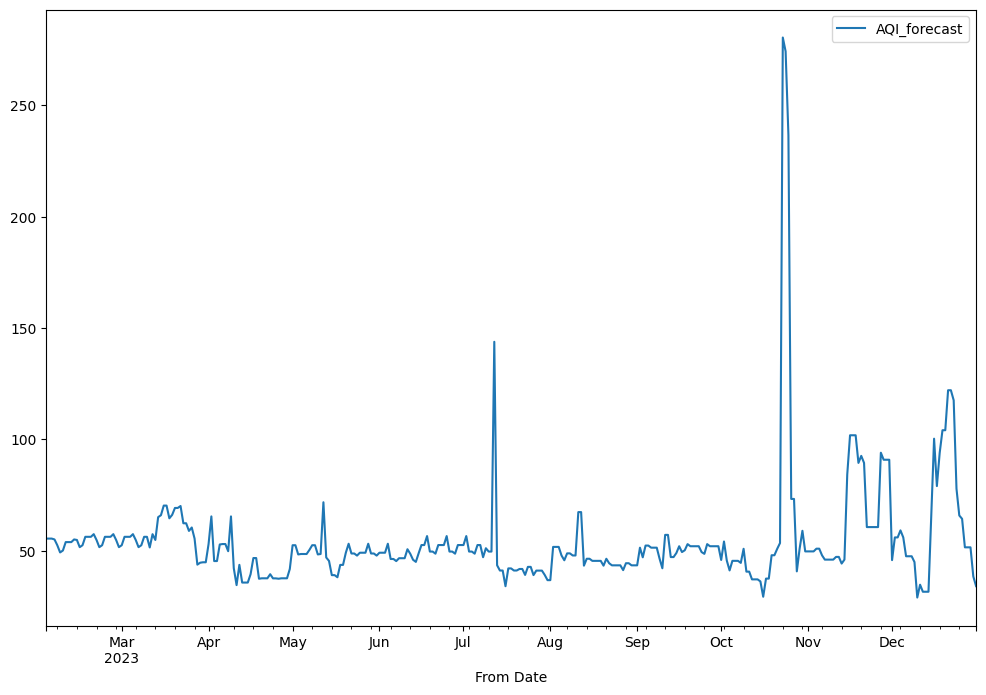

In [ ]:
df_forecast_values['AQI_forecast'].plot(figsize=(12,8), legend=True)

### **PM2.5 2023 Forecast**

<Axes: xlabel='From Date'>

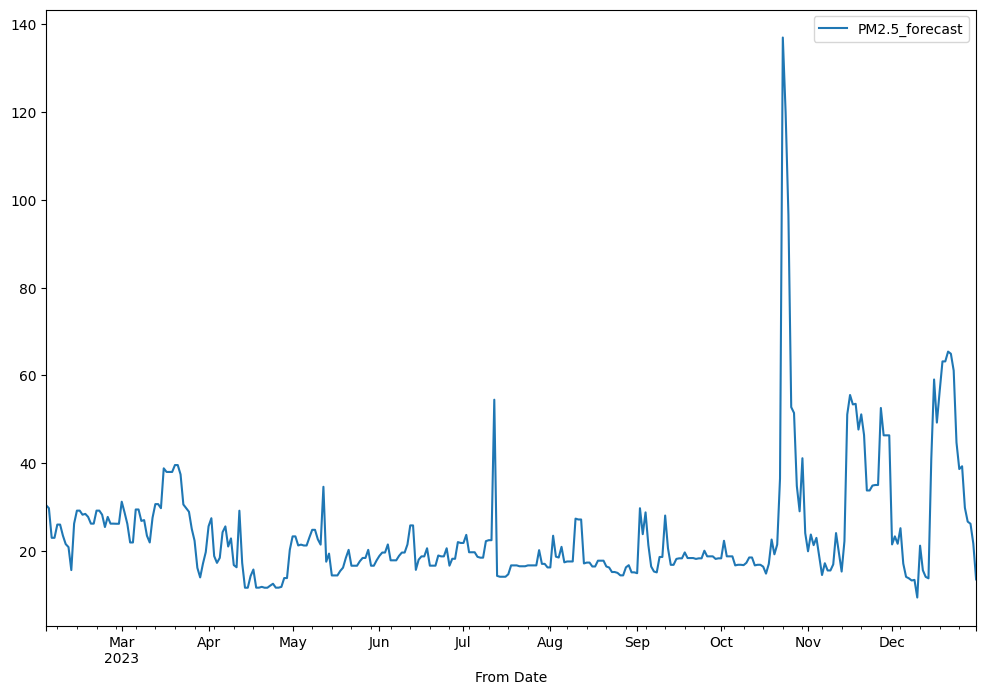

In [ ]:
df_forecast_values['PM2.5_forecast'].plot(figsize=(12,8), legend=True)

### **PM10 2023 Forecast**

<Axes: xlabel='From Date'>

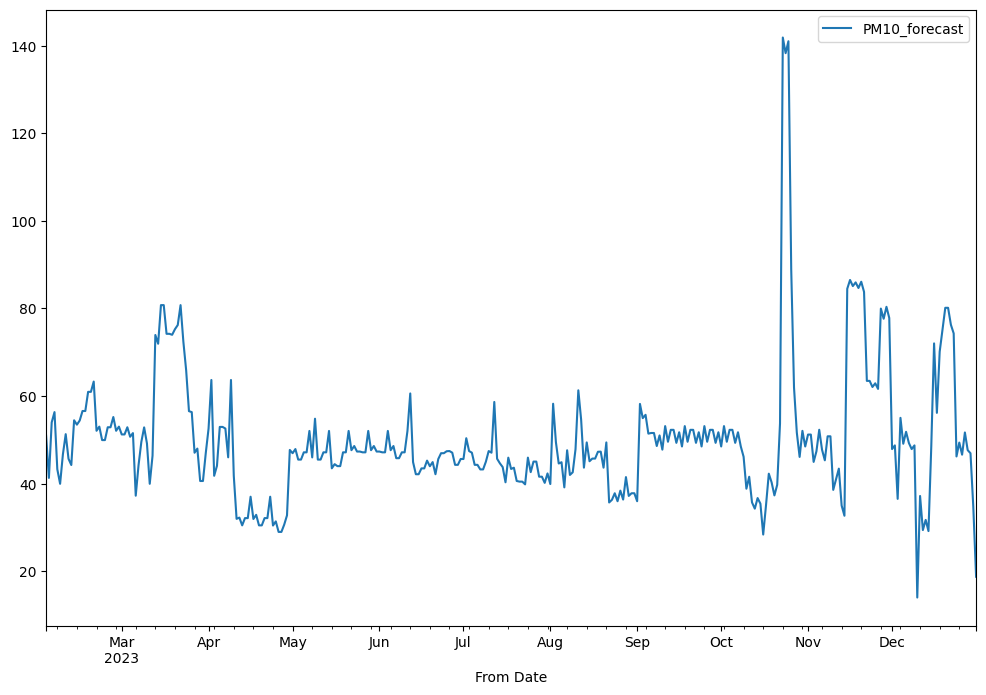

In [ ]:
df_forecast_values['PM10_forecast'].plot(figsize=(12,8), legend=True)

### **NO2 2023 Forecast**

<Axes: xlabel='From Date'>

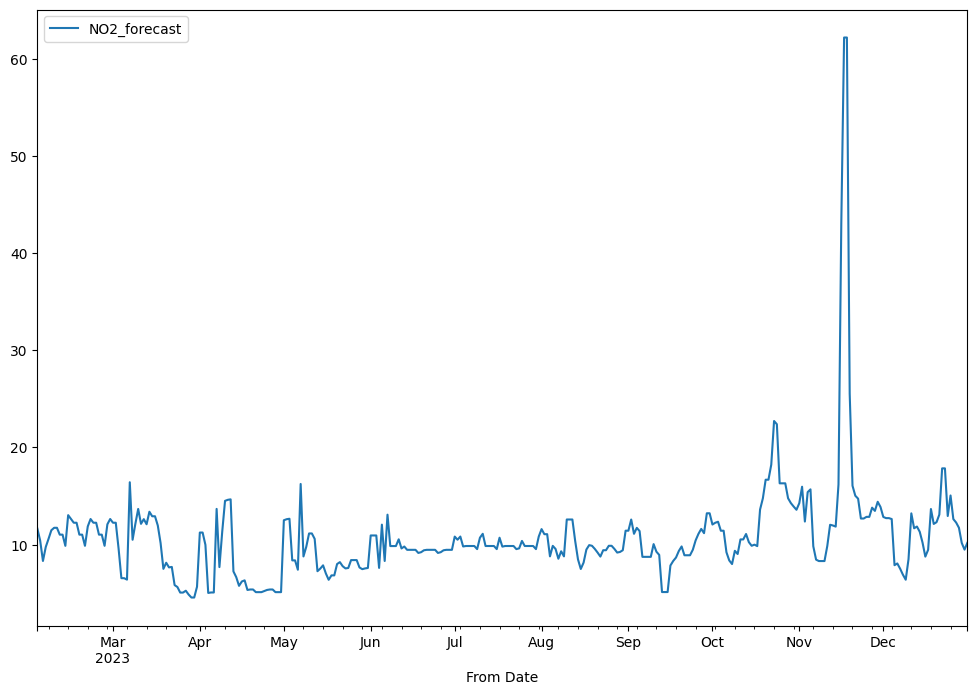

In [ ]:
df_forecast_values['NO2_forecast'].plot(figsize=(12,8), legend=True)

### **NOx 2023 Forecast**

<Axes: xlabel='From Date'>

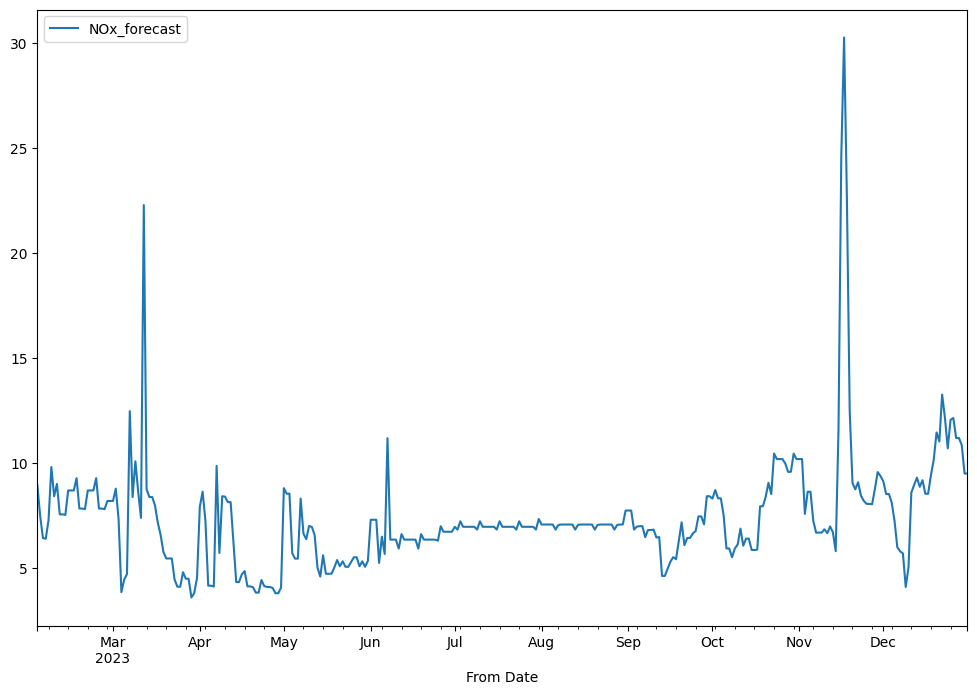

In [ ]:
df_forecast_values['NOx_forecast'].plot(figsize=(12,8), legend=True)

### **SO2 2023 Forecast**

<Axes: xlabel='From Date'>

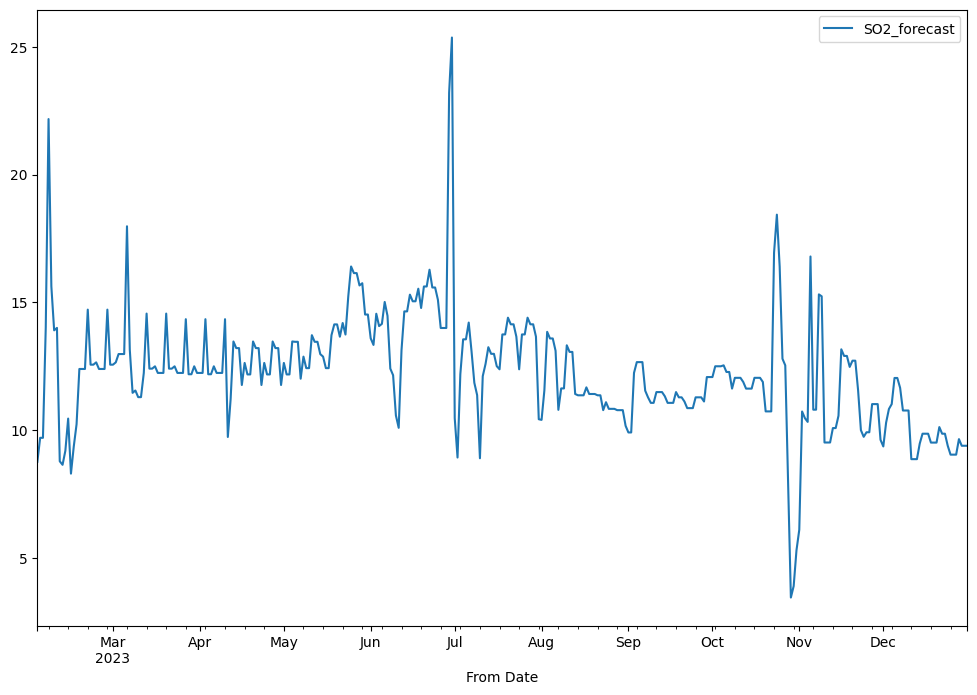

In [ ]:
df_forecast_values['SO2_forecast'].plot(figsize=(12,8), legend=True)

### **NH3 2023 Forecast**

<Axes: xlabel='From Date'>

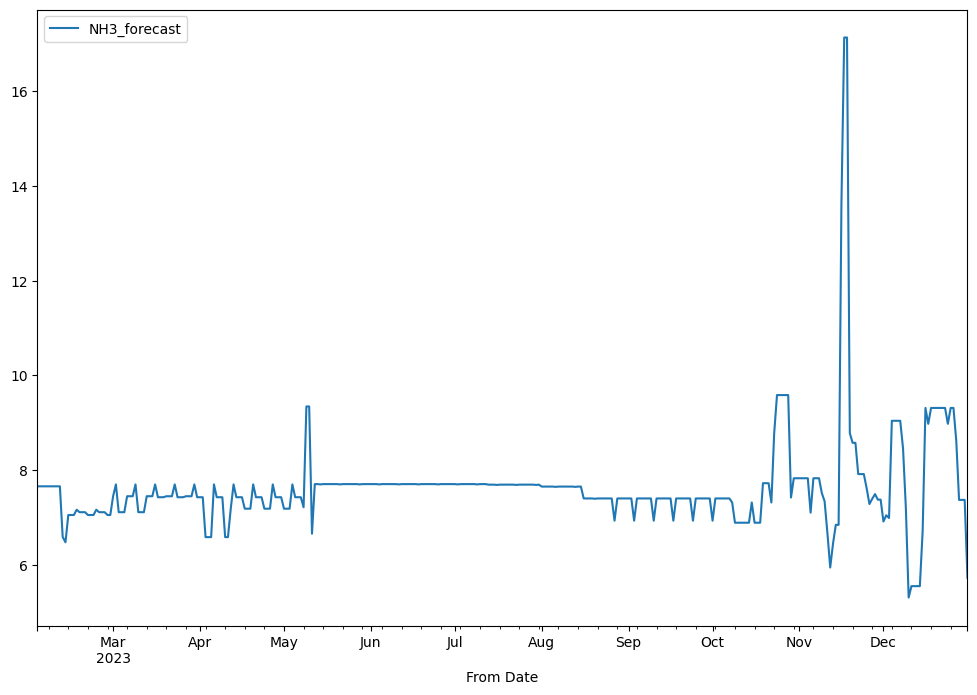

In [ ]:
df_forecast_values['NH3_forecast'].plot(figsize=(12,8), legend=True)

### **CO 2023 Forecast**

<Axes: xlabel='From Date'>

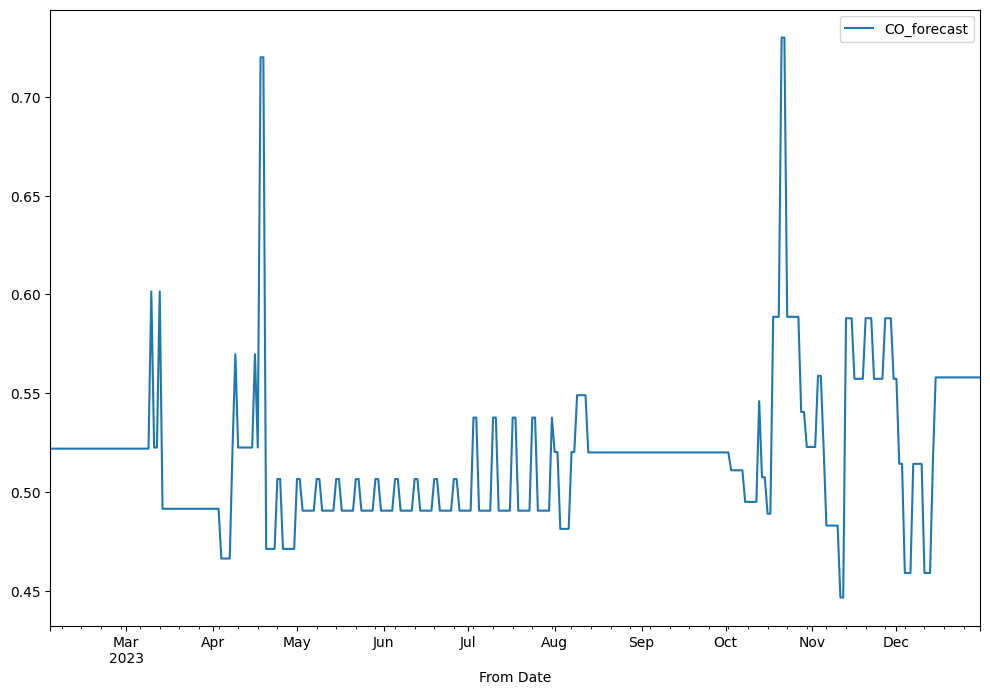

In [ ]:
df_forecast_values['CO_forecast'].plot(figsize=(12,8), legend=True)

### **O3 2023 Forecast**

<Axes: xlabel='From Date'>

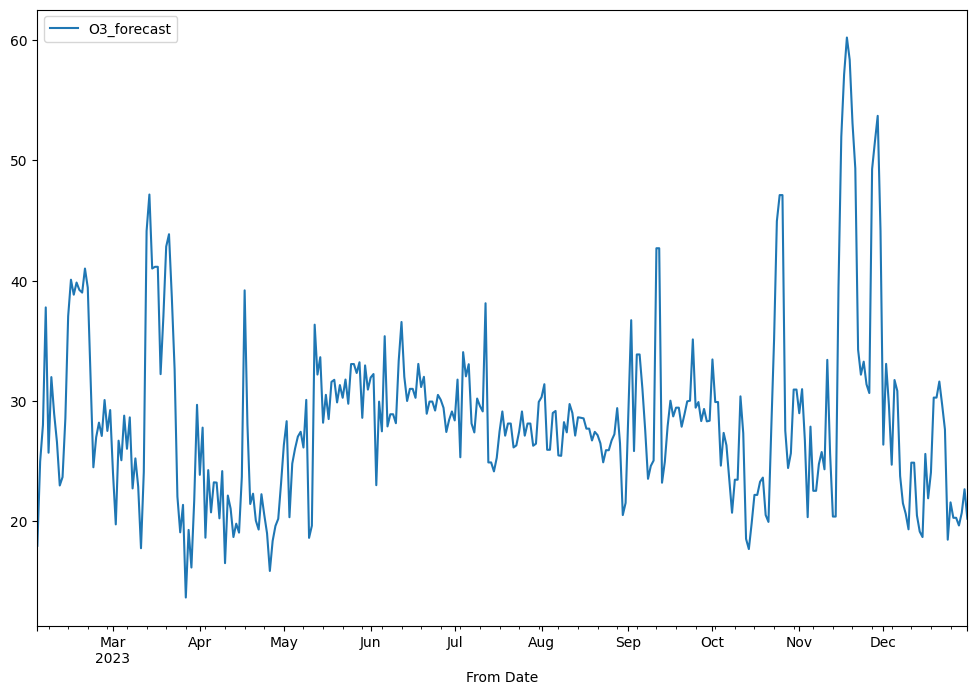

In [ ]:
df_forecast_values['O3_forecast'].plot(figsize=(12,8), legend=True)